In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Visualize plots in this Notebook
%matplotlib inline

In [5]:
# style lists
# 아래 스타일 중에서 본인 스타일대로 선택하여 시각화하면 됩니다
plt.style.use('ggplot') # plt 스타일 지정
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Week2: Exploratory Data Analysis

## Load Data

In [ ]:
data_directory = r'/content/drive/MyDrive/Data'
df = pd.read_csv(data_directory+'/Auto_adjust.csv')
# pd.read_excel()
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0        130  3504.0          12.0    70   
1  15.0        8.0           NaN        165  3693.0          11.5    70   
2  18.0        NaN         318.0        150  3436.0          11.0    70   
3  16.0        8.0         304.0        NaN  3433.0          12.0    70   
4  17.0        8.0         302.0        140  3449.0          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     393 non-null    float64
 2   displacement  393 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        391 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.0+ KB


In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', nan, '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '200',
       '210', '193', '100', '105', '175', '153', '180', '110', '72', '86',
       '70', '76', '65', '69', '60', '80', '54', '208', '155', '112',
       '92', '145', '137', '158', '167', '94', '107', '230', '49', '75',
       '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '?', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [ ]:
df['horsepower']=df['horsepower'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     393 non-null    float64
 2   displacement  393 non-null    float64
 3   horsepower    389 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 28.0+ KB


In [ ]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  397.000000  393.000000    393.000000  389.000000   391.000000   
mean    23.515869    5.442748    193.034351  104.349614  2966.079284   
std      7.825804    1.694049    104.023604   38.565998   847.405652   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.000000   75.000000  2221.500000   
50%     23.000000    4.000000    146.000000   92.000000  2795.000000   
75%     29.000000    8.000000    262.000000  125.000000  3607.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  397.000000  397.000000  
mean      15.544898   75.994962    1.574307  
std        2.761393    3.690005    0.802549  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

## Missing value

In [ ]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0    70   
1  15.0        8.0           NaN       165.0  3693.0          11.5    70   
2  18.0        NaN         318.0       150.0  3436.0          11.0    70   
3  16.0        8.0         304.0         NaN  3433.0          12.0    70   
4  17.0        8.0         302.0       140.0  3449.0          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [ ]:
# remove missing value
df.dropna().head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0    70   
4  17.0        8.0         302.0       140.0  3449.0          10.5    70   
6  14.0        8.0         454.0       220.0  4354.0           9.0    70   
7  14.0        8.0         440.0       215.0  4312.0           8.5    70   
8  14.0        8.0         455.0       225.0  4425.0          10.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
4       1                ford torino  
6       1           chevrolet impala  
7       1          plymouth fury iii  
8       1           pontiac catalina

In [ ]:
len(df.dropna())

371

In [ ]:
# Missing value fill
df2 = df.fillna(0)
df2.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0    70   
1  15.0        8.0           0.0       165.0  3693.0          11.5    70   
2  18.0        0.0         318.0       150.0  3436.0          11.0    70   
3  16.0        8.0         304.0         0.0  3433.0          12.0    70   
4  17.0        8.0         302.0       140.0  3449.0          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [ ]:
df['displacement'].fillna(0)
df['displacement'].fillna(max(df['displacement']))
df['displacement'].fillna(min(df['displacement']))
df['displacement'].fillna(np.mean(df['displacement']))

0      307.000000
1      193.034351
2      318.000000
3      304.000000
4      302.000000
          ...    
392    140.000000
393     97.000000
394    135.000000
395    120.000000
396    119.000000
Name: displacement, Length: 397, dtype: float64

In [ ]:
df['displacement'].bfill() # back
df['displacement'].ffill() # front

0      307.0
1      307.0
2      318.0
3      304.0
4      302.0
       ...  
392    140.0
393     97.0
394    135.0
395    120.0
396    119.0
Name: displacement, Length: 397, dtype: float64

In [ ]:
# Interpolation
df['displacement'].interpolate()

0      307.0
1      312.5
2      318.0
3      304.0
4      302.0
       ...  
392    140.0
393     97.0
394    135.0
395    120.0
396    119.0
Name: displacement, Length: 397, dtype: float64

## Data preprocessing

In [ ]:
df = df.dropna()
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0    70   
4  17.0        8.0         302.0       140.0  3449.0          10.5    70   
6  14.0        8.0         454.0       220.0  4354.0           9.0    70   
7  14.0        8.0         440.0       215.0  4312.0           8.5    70   
8  14.0        8.0         455.0       225.0  4425.0          10.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
4       1                ford torino  
6       1           chevrolet impala  
7       1          plymouth fury iii  
8       1           pontiac catalina

In [ ]:
df.reset_index(inplace=True,drop=True)
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0        8.0         307.0       130.0  3504.0          12.0    70   
1  17.0        8.0         302.0       140.0  3449.0          10.5    70   
2  14.0        8.0         454.0       220.0  4354.0           9.0    70   
3  14.0        8.0         440.0       215.0  4312.0           8.5    70   
4  14.0        8.0         455.0       225.0  4425.0          10.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1                ford torino  
2       1           chevrolet impala  
3       1          plymouth fury iii  
4       1           pontiac catalina

In [ ]:
df.index = df['name']
df.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0        8.0         307.0       130.0  3504.0   
ford torino                17.0        8.0         302.0       140.0  3449.0   
chevrolet impala           14.0        8.0         454.0       220.0  4354.0   
plymouth fury iii          14.0        8.0         440.0       215.0  4312.0   
pontiac catalina           14.0        8.0         455.0       225.0  4425.0   

                           acceleration  year  origin  \
name                                                    
chevrolet chevelle malibu          12.0    70       1   
ford torino                        10.5    70       1   
chevrolet impala                    9.0    70       1   
plymouth fury iii                   8.5    70       1   
pontiac catalina                   10.0    70       1   

                                                name  
name                                                  
chevrolet chevelle malibu  chevrolet chevelle malibu  
ford torino                              ford torino  
chevrolet impala                    chevrolet impala  
plymouth fury iii                  plymouth fury iii  
pontiac catalina                    pontiac catalina

In [ ]:
df=df[list(df.columns)[:-1]]
df.head()

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0        8.0         307.0       130.0  3504.0   
ford torino                17.0        8.0         302.0       140.0  3449.0   
chevrolet impala           14.0        8.0         454.0       220.0  4354.0   
plymouth fury iii          14.0        8.0         440.0       215.0  4312.0   
pontiac catalina           14.0        8.0         455.0       225.0  4425.0   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
ford torino                        10.5    70       1  
chevrolet impala                    9.0    70       1  
plymouth fury iii                   8.5    70       1  
pontiac catalina                   10.0    70       1

In [ ]:
np.corrcoef(df['mpg'],df['weight'])

array([[ 1.        , -0.83007742],
       [-0.83007742,  1.        ]])

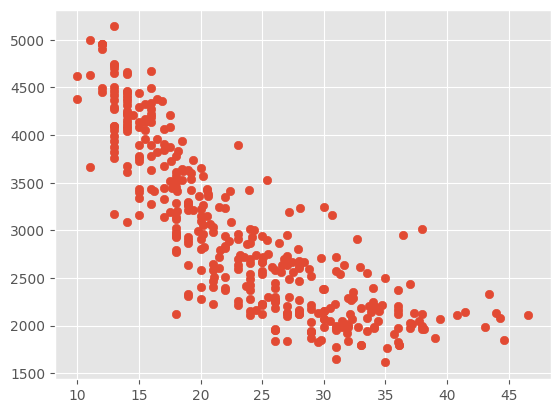

In [ ]:
plt.scatter(df['mpg'],df['weight'])

In [ ]:
np.corrcoef(df['mpg'],df['acceleration'])

array([[1.        , 0.42459305],
       [0.42459305, 1.        ]])

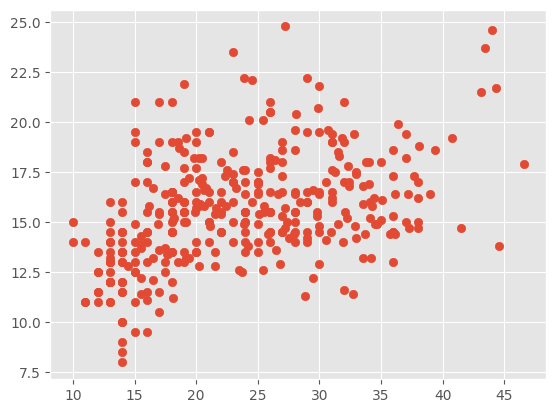

In [ ]:
plt.scatter(df['mpg'],df['acceleration'])

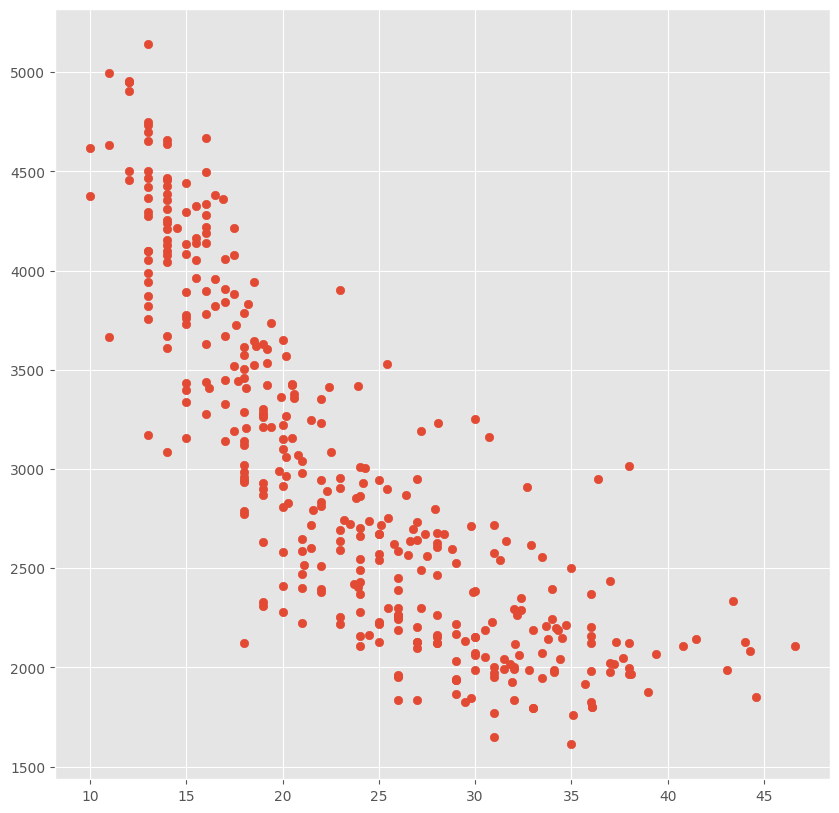

In [ ]:
def scatter_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.scatter(x1,x2)
scatter_figure(df['mpg'],df['weight'])

In [ ]:
df.groupby('year').mean()

mpg  cylinders  displacement  horsepower       weight  \
year                                                                
70    18.315789   6.526316    270.526316  139.631579  3251.157895   
71    21.076923   5.692308    216.730769  108.384615  3054.538462   
72    18.192308   5.961538    226.826923  122.153846  3302.384615   
73    17.100000   6.375000    256.875000  130.475000  3419.025000   
74    22.769231   5.230769    170.653846   94.230769  2878.038462   
75    20.266667   5.600000    205.533333  101.066667  3176.800000   
76    21.573529   5.647059    197.794118  101.117647  3078.735294   
77    23.375000   5.464286    191.392857  105.071429  2997.357143   
78    24.061111   5.361111    177.805556   99.694444  2861.805556   
79    25.093103   5.827586    206.689655  101.206897  3055.344828   
80    34.369231   4.076923    111.884615   77.000000  2405.461538   
81    30.476000   4.480000    126.800000   80.840000  2476.000000   
82    32.576923   4.153846    124.500000   80.115385  2414.230769   

      acceleration    origin  
year                          
70       13.184211  1.368421  
71       14.846154  1.461538  
72       15.076923  1.423077  
73       14.312500  1.375000  
74       16.173077  1.692308  
75       16.050000  1.466667  
76       15.941176  1.470588  
77       15.435714  1.571429  
78       15.805556  1.611111  
79       15.813793  1.275862  
80       16.953846  2.307692  
81       16.184000  2.000000  
82       16.746154  1.615385

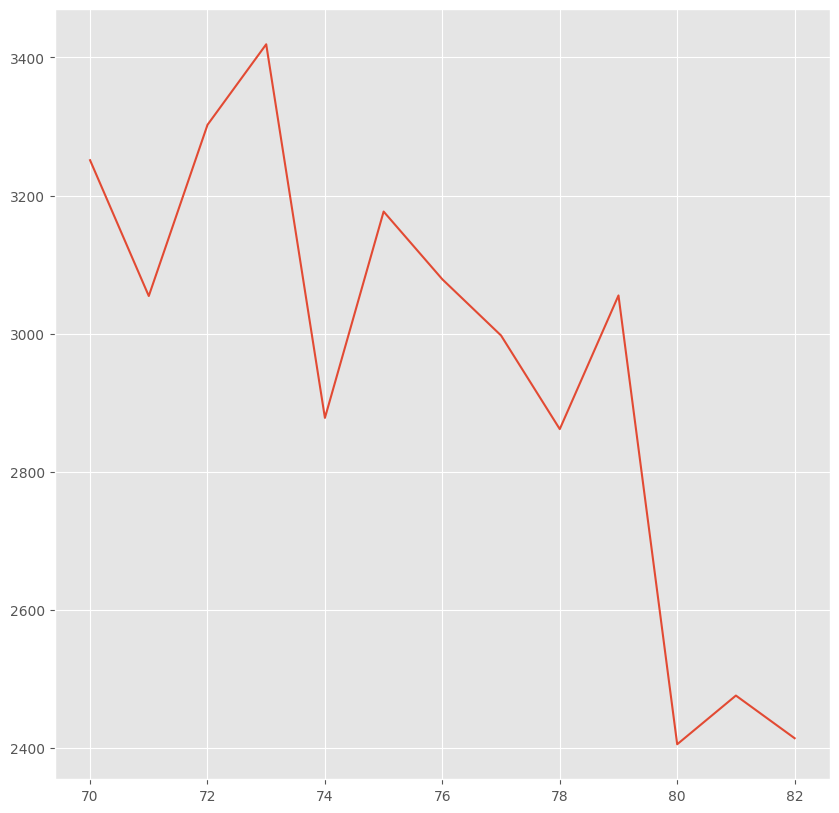

In [ ]:
def line_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.plot(x1,x2)

line_figure(df.groupby('year').mean().index,df.groupby('year').mean()['weight'])

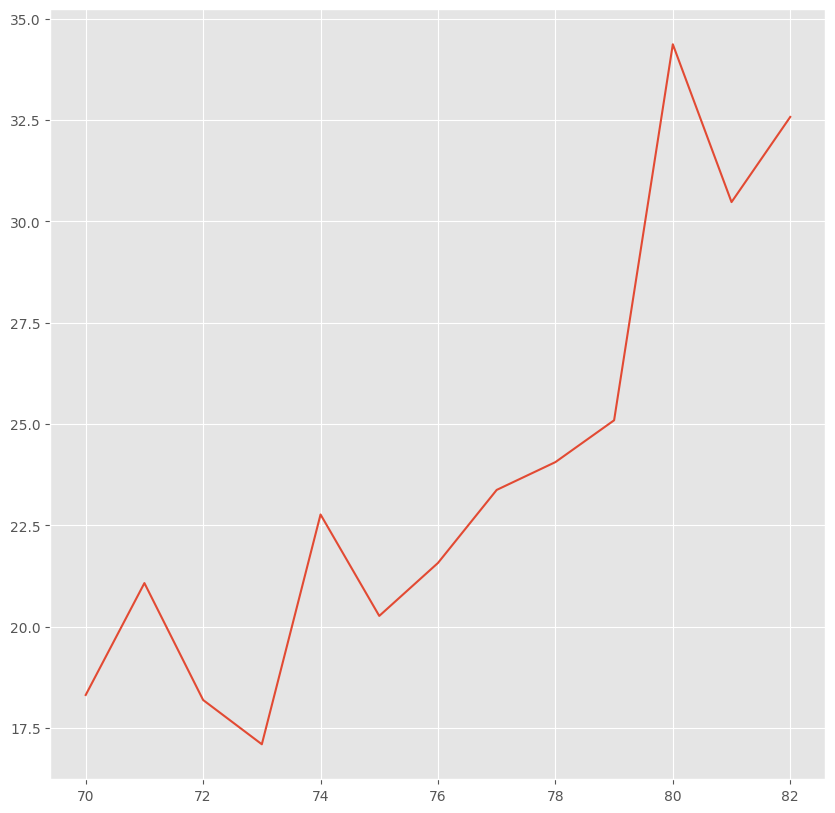

In [ ]:
line_figure(df.groupby('year').mean().index,df.groupby('year').mean()['mpg'])

In [ ]:
from collections import Counter

In [ ]:
df.head(1)

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0        8.0         307.0       130.0  3504.0   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1

In [ ]:
Counter([item[0] for item in df.index.str.split(' ')])

Counter({'chevrolet': 42,
         'ford': 45,
         'plymouth': 30,
         'pontiac': 16,
         'buick': 16,
         'toyota': 23,
         'amc': 25,
         'datsun': 22,
         'volkswagen': 15,
         'peugeot': 8,
         'audi': 7,
         'chevy': 3,
         'dodge': 25,
         'mercury': 11,
         'opel': 4,
         'fiat': 8,
         'oldsmobile': 9,
         'chrysler': 5,
         'mazda': 10,
         'volvo': 6,
         'renault': 3,
         'maxda': 2,
         'saab': 3,
         'honda': 12,
         'subaru': 4,
         'chevroelt': 1,
         'capri': 1,
         'vw': 6,
         'mercedes-benz': 2,
         'cadillac': 2,
         'bmw': 1,
         'mercedes': 1,
         'vokswagen': 1,
         'triumph': 1,
         'nissan': 1})

In [ ]:
temp_list = Counter([item[0] for item in df.index.str.split(' ')]).most_common(10)

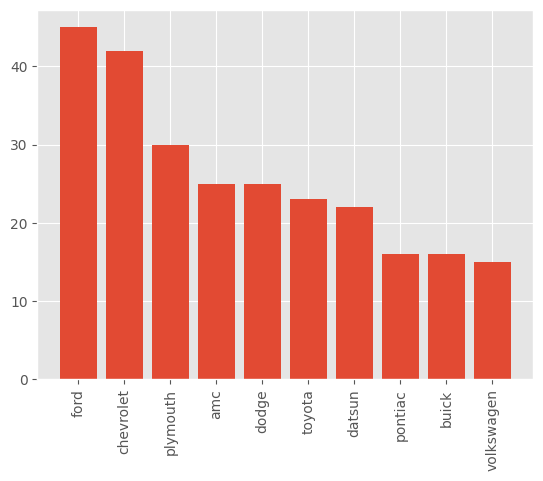

In [ ]:
plt.bar([item[0] for item in temp_list],[item[1] for item in temp_list])
plt.tick_params(axis = 'x', rotation=90)

In [ ]:
dict(zip([item[0] for item in temp_list],[item[1] for item in temp_list]))

{'ford': 45,
 'chevrolet': 42,
 'plymouth': 30,
 'amc': 25,
 'dodge': 25,
 'toyota': 23,
 'datsun': 22,
 'pontiac': 16,
 'buick': 16,
 'volkswagen': 15}

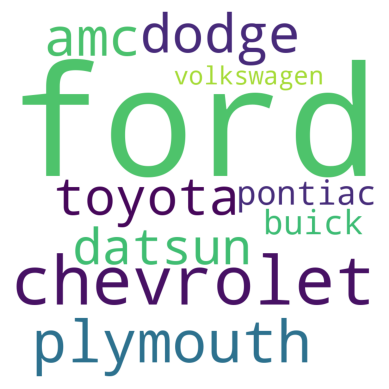

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=400, height=400, scale=2.0, max_font_size=250,background_color='white')
wc.generate_from_frequencies(dict(zip([item[0] for item in temp_list],[item[1] for item in temp_list])))

plt.xticks([])
plt.yticks([])
plt.imshow(wc)

In [ ]:
df['firm']=[item[0] for item in df.index.str.split(' ')]

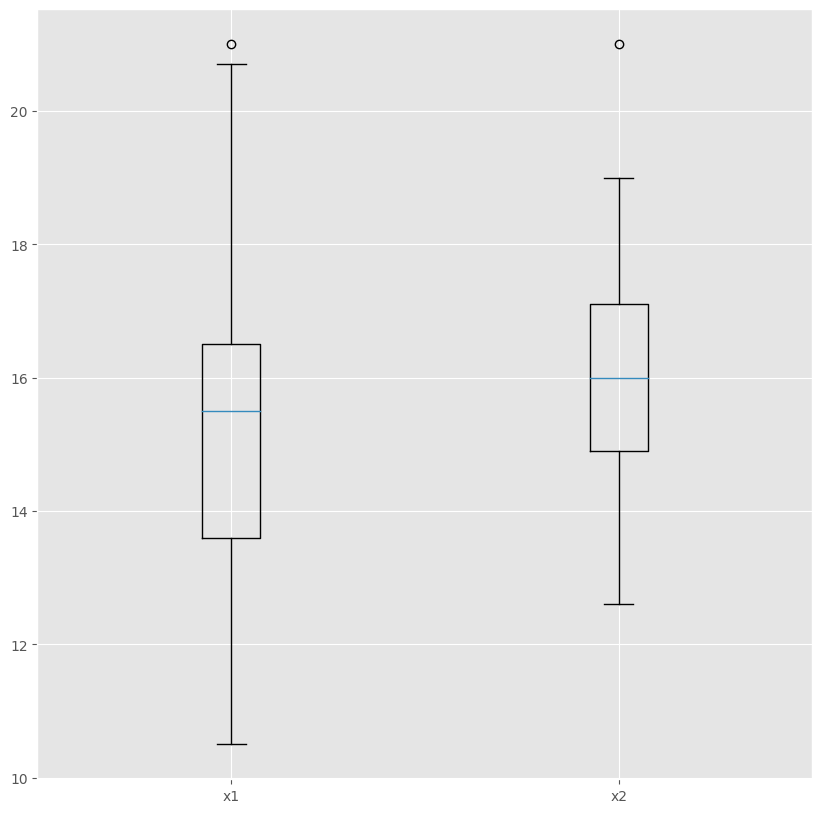

In [ ]:
def box_figure(x1,x2):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  ax.boxplot([x1,x2])
  ax.set_xticklabels(['x1','x2'])

box_figure(df[df['firm']=='ford']['acceleration'],df[df['firm']=='toyota']['acceleration'])

In [ ]:
def pi_figure(temp_dict):
  fig = plt.figure(figsize=(10,10))
  ax = plt.subplot(111)
  w = {"edgecolor": "black", "linewidth":1, "width":0.5}
  ax.pie(list(temp_dict.values()),autopct='%.2f%%',pctdistance=0.8,wedgeprops=w,textprops={'fontsize': 25,'fontweight':'bold'},labels=temp_dict.keys())
  #ax.legend()

df[df['firm'].isin(['ford','toyota','chevrolet'])]

mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0        8.0         307.0       130.0  3504.0   
ford torino                17.0        8.0         302.0       140.0  3449.0   
chevrolet impala           14.0        8.0         454.0       220.0  4354.0   
chevrolet monte carlo      15.0        8.0         400.0       150.0  3761.0   
toyota corona mark ii      24.0        4.0         113.0        95.0  2372.0   
...                         ...        ...           ...         ...     ...   
chevrolet cavalier 2-door  34.0        4.0         112.0        88.0  2395.0   
ford fairmont futura       24.0        4.0         140.0        92.0  2865.0   
toyota corolla             34.0        4.0         108.0        70.0  2245.0   
chevrolet camaro           27.0        4.0         151.0        90.0  2950.0   
ford ranger                28.0        4.0         120.0        79.0  2625.0   

                           acceleration  year  origin       firm  
name                                                              
chevrolet chevelle malibu          12.0    70       1  chevrolet  
ford torino                        10.5    70       1       ford  
chevrolet impala                    9.0    70       1  chevrolet  
chevrolet monte carlo               9.5    70       1  chevrolet  
toyota corona mark ii              15.0    70       3     toyota  
...                                 ...   ...     ...        ...  
chevrolet cavalier 2-door          18.0    82       1  chevrolet  
ford fairmont futura               16.4    82       1       ford  
toyota corolla                     16.9    82       3     toyota  
chevrolet camaro                   17.3    82       1  chevrolet  
ford ranger                        18.6    82       1       ford  

[110 rows x 9 columns]

In [ ]:
dict(Counter(df[df['firm'].isin(['ford','toyota','chevrolet'])]['firm']))

{'chevrolet': 42, 'ford': 45, 'toyota': 23}

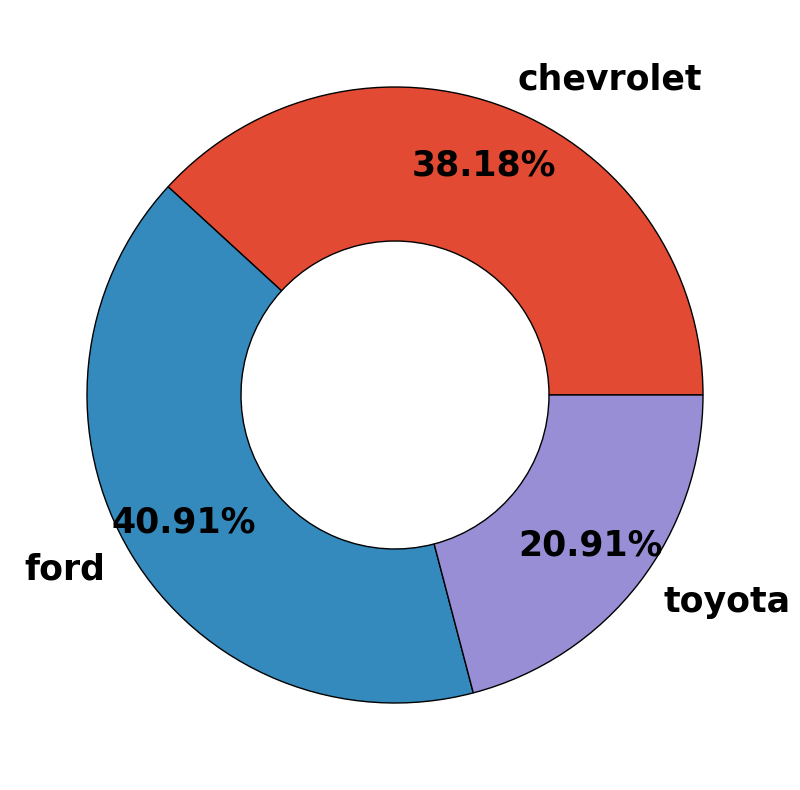

In [ ]:
pi_figure(dict(Counter(df[df['firm'].isin(['ford','toyota','chevrolet'])]['firm'])))

## Patterns in Data

In [ ]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776761     -0.806987   -0.776725 -0.830077   
cylinders    -0.776761   1.000000      0.949783    0.843563  0.898321   
displacement -0.806987   0.949783      1.000000    0.901567  0.936704   
horsepower   -0.776725   0.843563      0.901567    1.000000  0.868884   
weight       -0.830077   0.898321      0.936704    0.868884  1.000000   
acceleration  0.424593  -0.504532     -0.539820   -0.691060 -0.422788   
year          0.580872  -0.338125     -0.364685   -0.384989 -0.304416   
origin        0.555427  -0.560118     -0.608454   -0.451996 -0.577258   

              acceleration      year    origin  
mpg               0.424593  0.580872  0.555427  
cylinders        -0.504532 -0.338125 -0.560118  
displacement     -0.539820 -0.364685 -0.608454  
horsepower       -0.691060 -0.384989 -0.451996  
weight           -0.422788 -0.304416 -0.577258  
acceleration      1.000000  0.268772  0.214964  
year              0.268772  1.000000  0.177791  
origin            0.214964  0.177791  1.000000

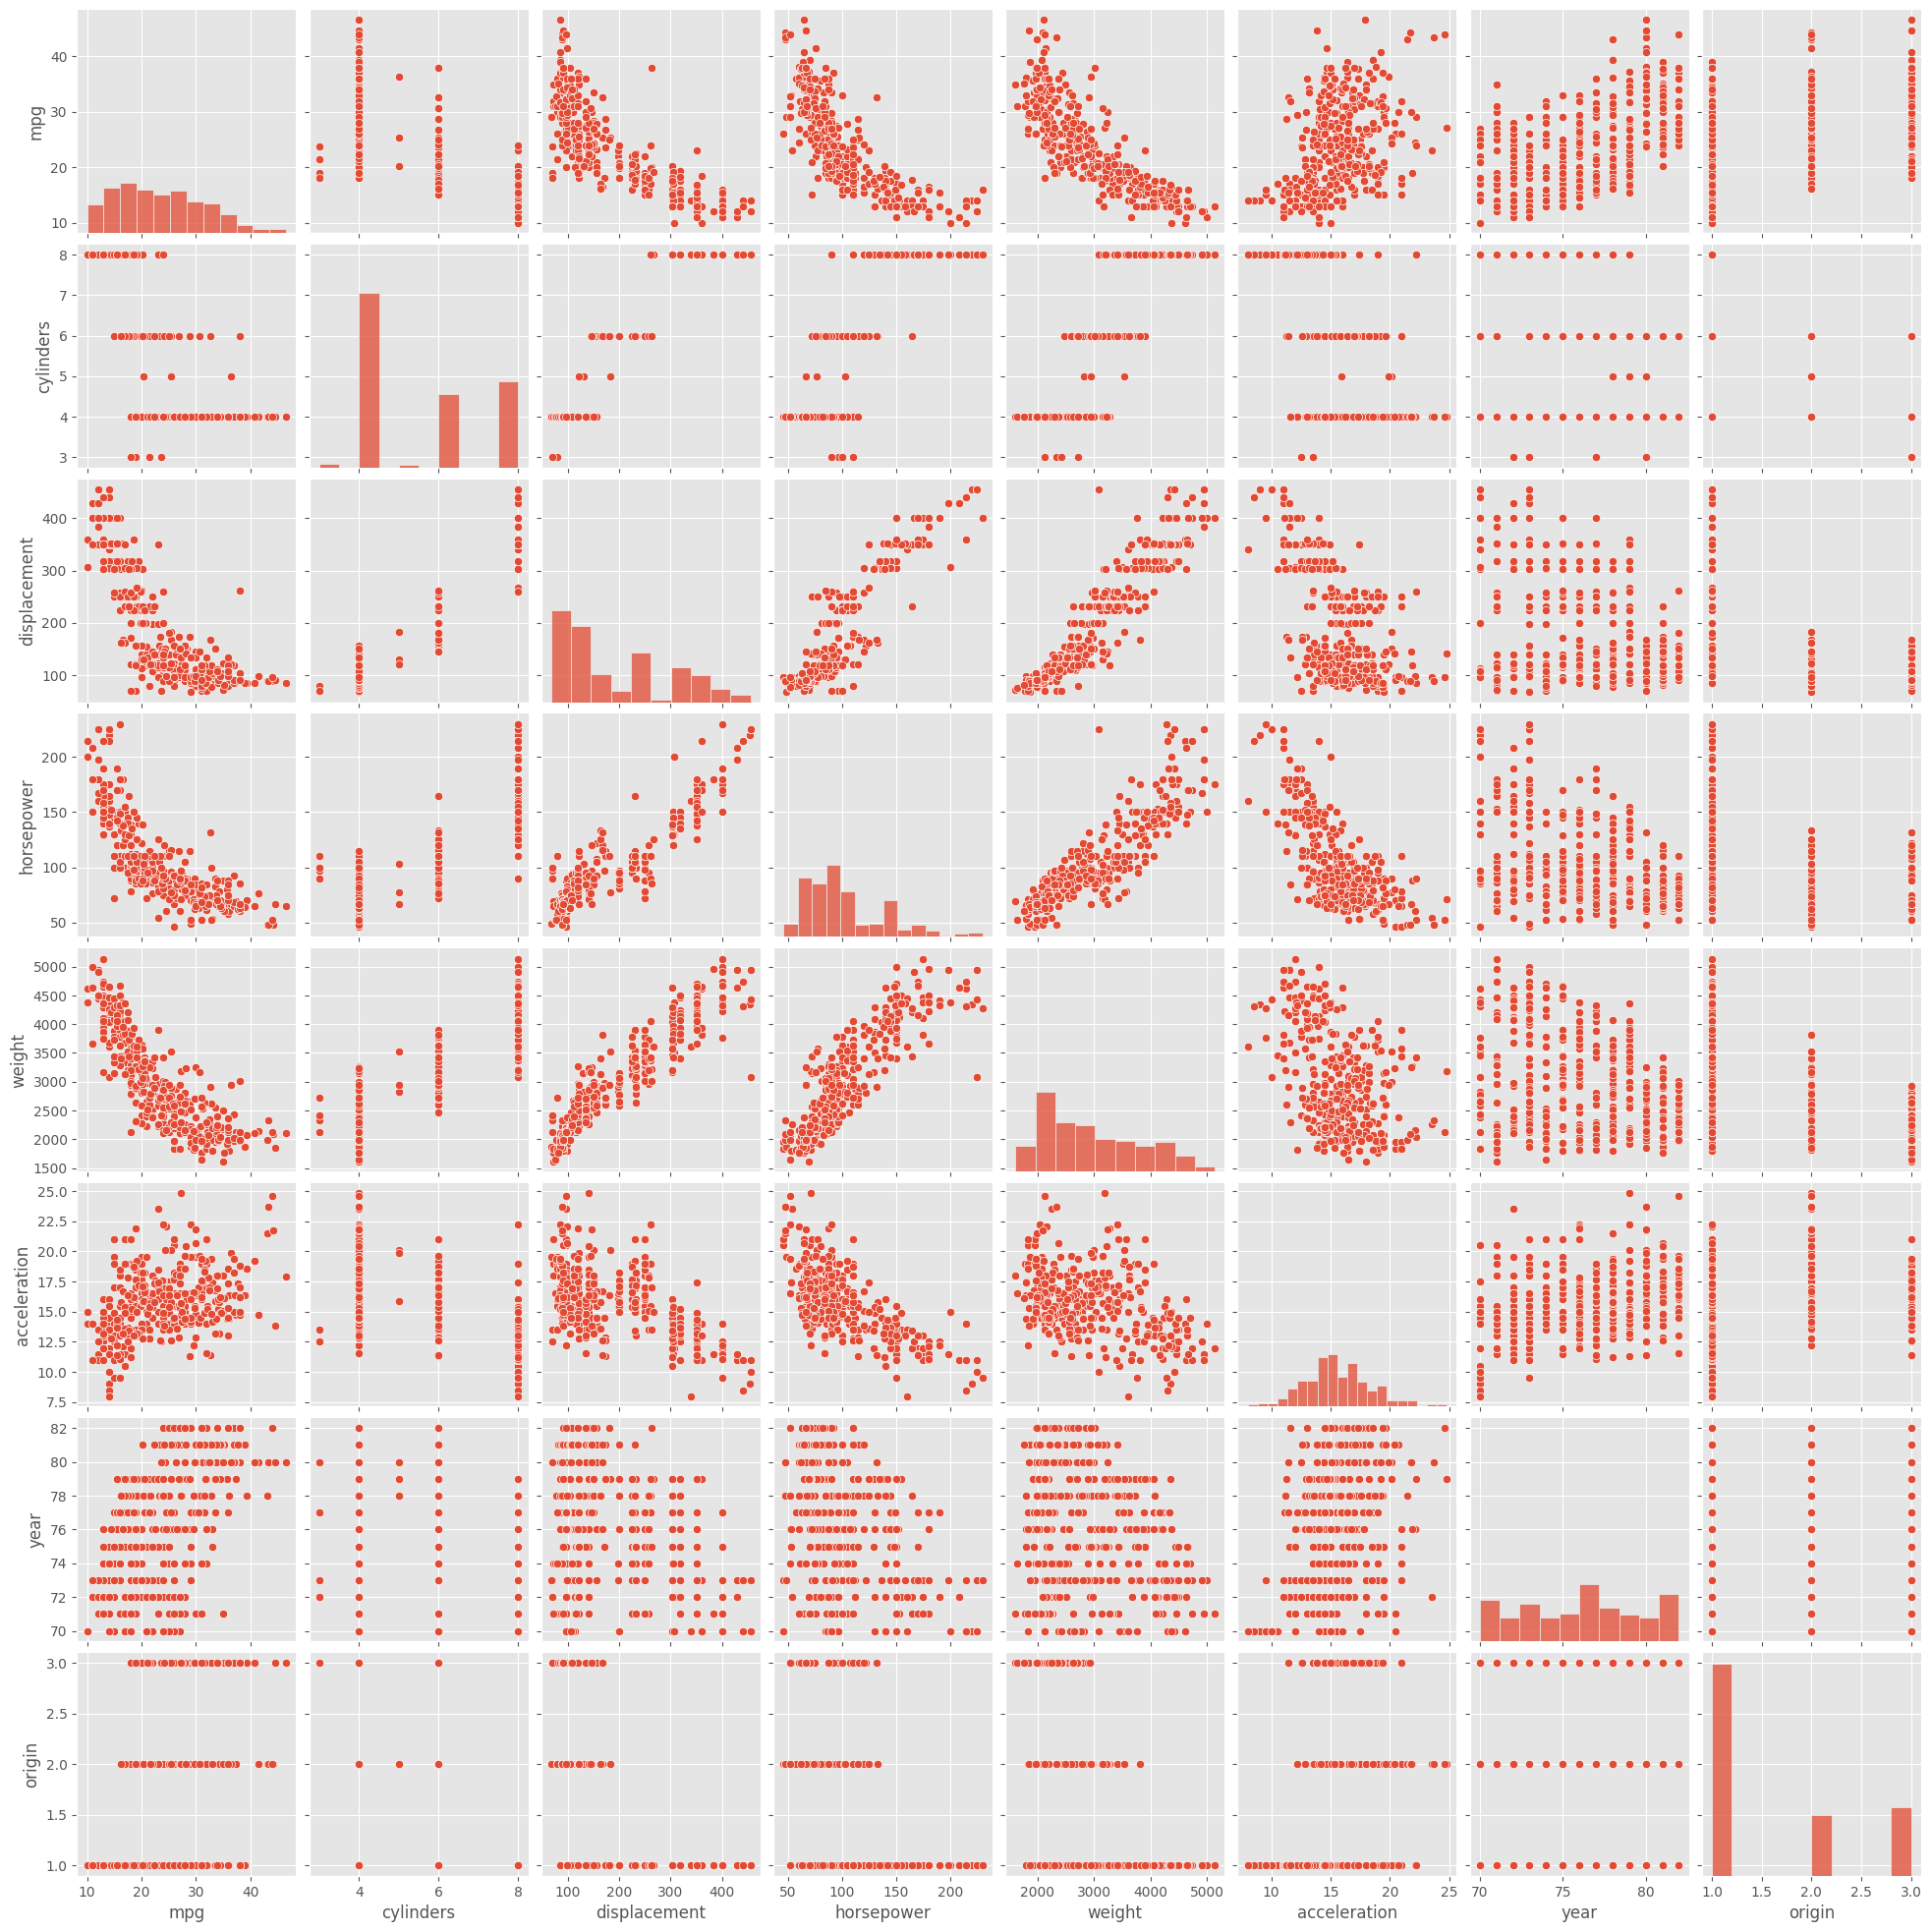

In [ ]:
sns.pairplot(df[df.columns[:-1]])

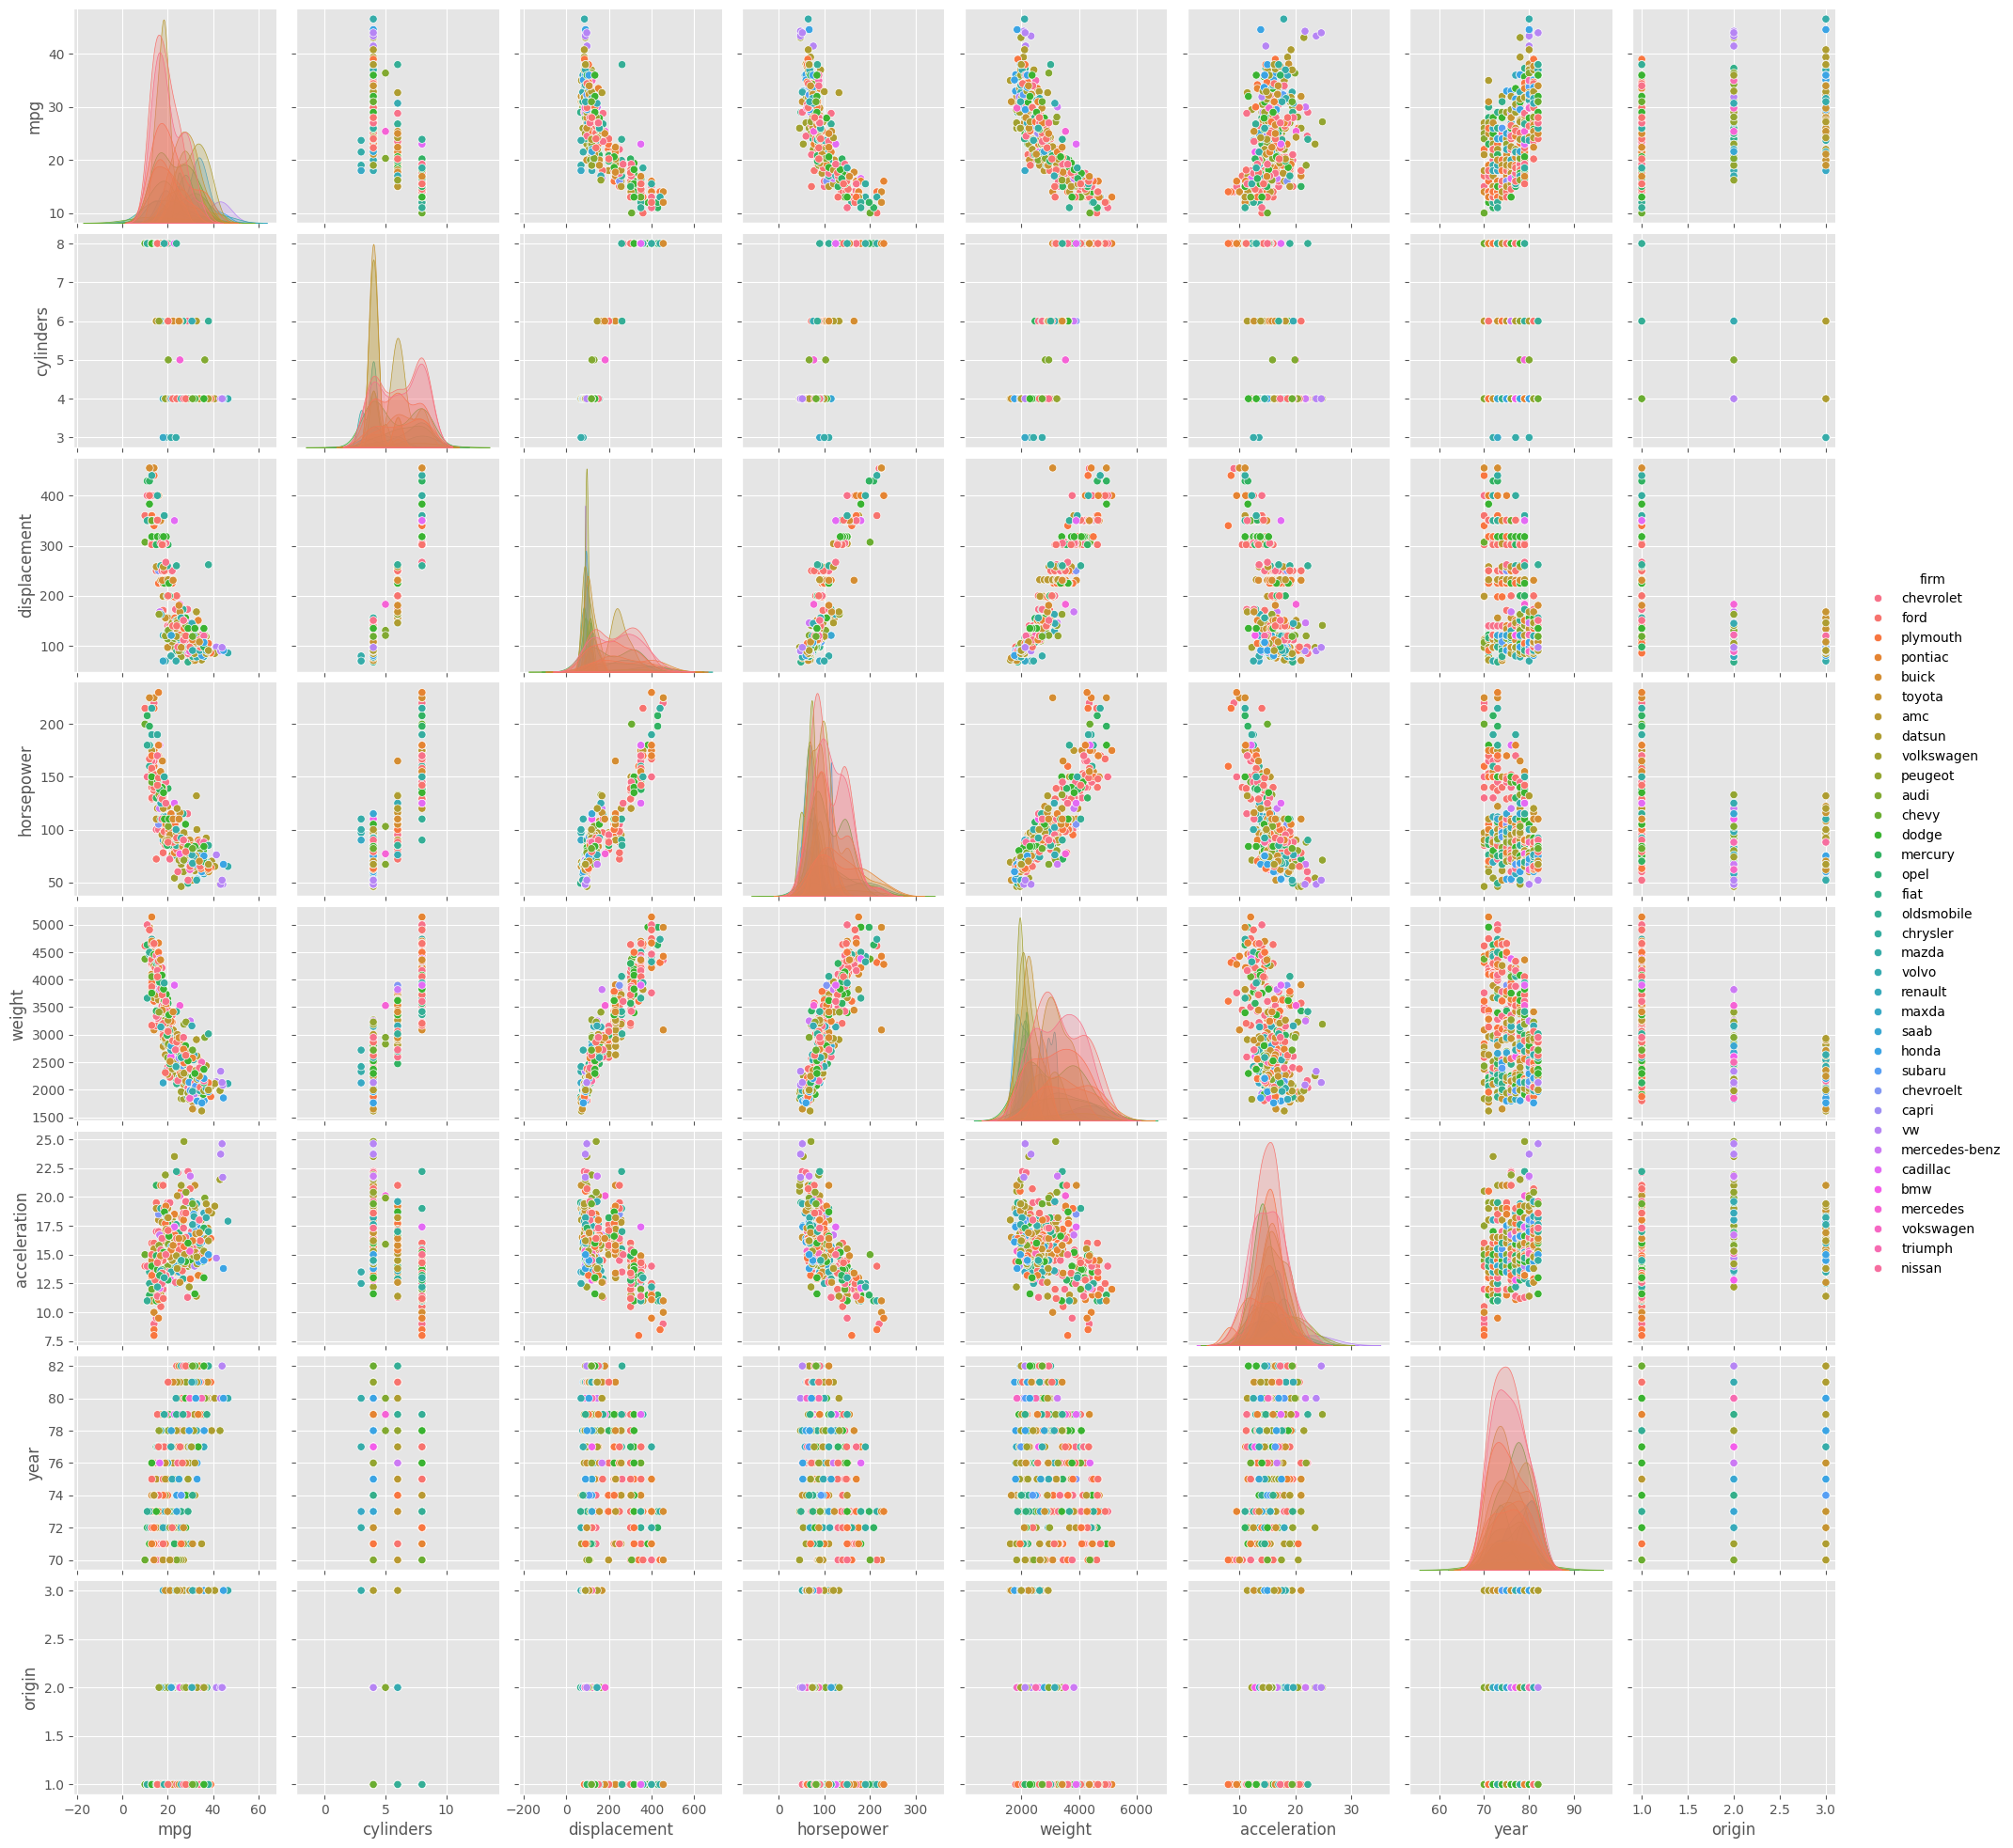

In [ ]:
sns.pairplot(df[df.columns],hue='firm')

# Week3: Linear Regression

## Data Import

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Data/Advertising.csv')
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

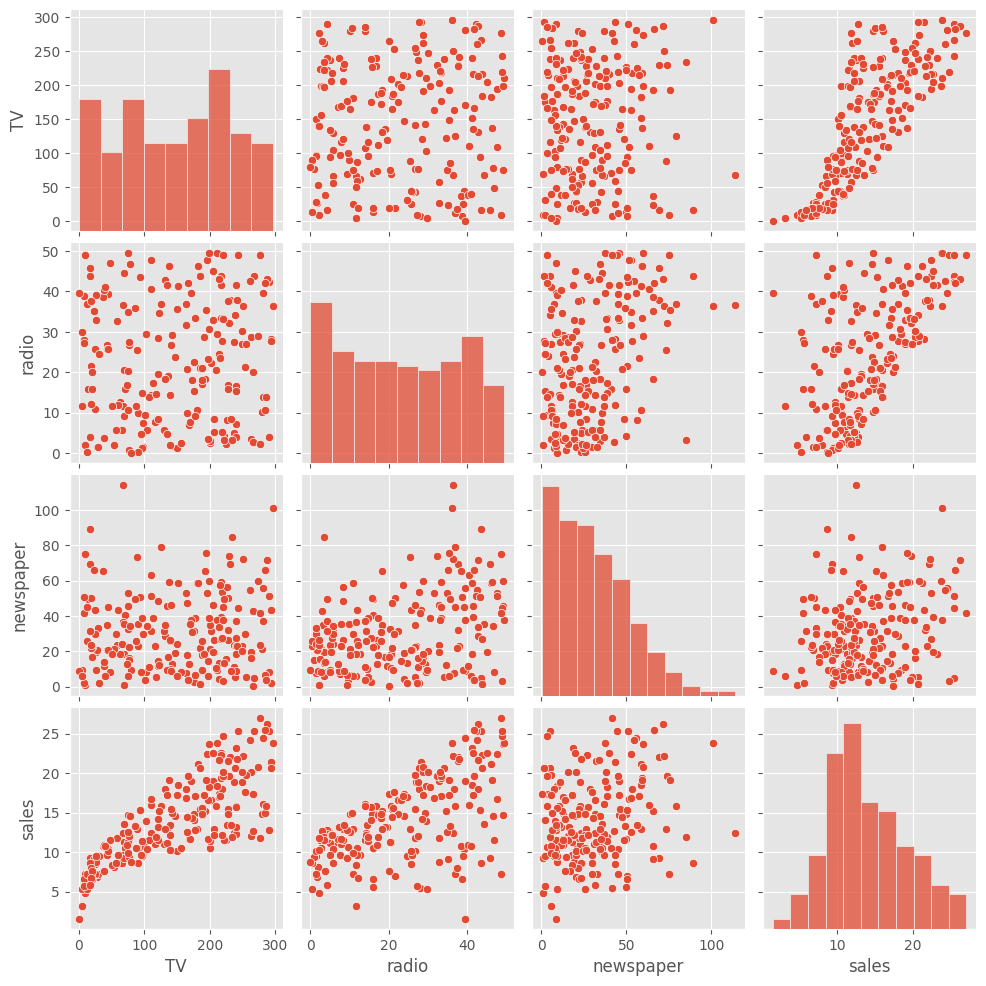

In [ ]:
sns.pairplot(df[df.columns[1:]])

## Single Linear Regression

In [ ]:
# Assumption Y ~ N (0,constant variance)
Y = np.array(df[['sales']])
Y.shape

(200, 1)

In [ ]:
X = np.array(df[['TV']])
X.shape

(200, 1)

In [ ]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[0.08324961]])

In [ ]:
Y_hat = coeff*X
Y_bar = 0
residuals = Y-Y_hat

In [ ]:
TSS = np.sum((Y-Y_bar)**2)
SSreg = np.sum((Y_hat-Y_bar)**2)
RSS = np.sum((Y-Y_hat)**2)
n = Y.shape[0]
p = X.shape[1]
print("TSS = ", TSS)
print("SSreg = ", SSreg)
print("RSS = ", RSS)
print("SSreg + RSS = ", SSreg + RSS)
print("R squared = ", 1-RSS/TSS)
print("Adjusted R squared = ", 1-(RSS/(n-p-1))/(TSS/(n-1)))

TSS =  44743.25
SSreg =  40135.330664092246
RSS =  4607.91933590774
SSreg + RSS =  44743.249999999985
R squared =  0.8970142013396939
Adjusted R squared =  0.8964940710434297


In [ ]:
# sm 라이브러리 활용
features = ['TV']
model = sm.OLS(Y,df[features])
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   3.52e-100
Time:                        05:55:01   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("TSS = ", result.uncentered_tss)
print("SSreg = ", result.mse_model)
print("RSS = ", result.ssr)
print("SSreg + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)
print("Adjusted R squared = ", result.rsquared_adj)

TSS =  44743.25
SSreg =  40135.33066409226
RSS =  4607.919335907738
SSreg + RSS =  44743.25
R squared =  0.897014201339694
Adjusted R squared =  0.8964966847635116


## Multiple Regression Model

In [ ]:
# Assumption Y ~ N (0,constant variance)
Y = np.array(df[['sales']])
Y.shape

(200, 1)

In [ ]:
features = ['TV','radio','newspaper']
X = np.array(df[features])
X.shape

(200, 3)

In [ ]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[0.05379188],
       [0.22222731],
       [0.01681639]])

In [ ]:
Y_hat = np.dot(X,coeff)
Y_bar = 0
residuals = Y-Y_hat

In [ ]:
TSS = np.sum((Y-Y_bar)**2)
SSreg = np.sum((Y_hat-Y_bar)**2)
RSS = np.sum((Y-Y_hat)**2)
n = Y.shape[0]
p = X.shape[1]
print("TSS = ", TSS)
print("SSreg = ", SSreg)
print("RSS = ", RSS)
print("SSreg + RSS = ", SSreg + RSS)
print("R squared = ", 1-RSS/TSS)
print("Adjusted R squared = ", 1-(RSS/(n-p-1))/(TSS/(n-1)))

TSS =  44743.25
SSreg =  43934.20698578675
RSS =  809.04301421321
SSreg + RSS =  44743.249999999956
R squared =  0.9819180990604569
Adjusted R squared =  0.981641335270566


In [ ]:
# sm 라이브러리 활용
model = sm.OLS(Y,df[features])
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   2.43e-171
Time:                        05:55:01   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("TSS = ", result.uncentered_tss)
print("SSreg = ", result.mse_model)
print("RSS = ", result.ssr)
print("SSreg + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)
print("Adjusted R squared = ", result.rsquared_adj)

TSS =  44743.25
SSreg =  14644.73566192893
RSS =  809.04301421321
SSreg + RSS =  15453.77867614214
R squared =  0.9819180990604569
Adjusted R squared =  0.9816427401629004


## With Constant

In [ ]:
df['constant']=[1 for i in range(len(df))]

features = ['TV','radio','newspaper']
X = np.array(df[['constant']+features])
X.shape

(200, 4)

In [ ]:
# Numpy로 만들기
_ = np.dot(np.transpose(X),X)
_ = np.linalg.inv(_)
_ = np.dot(_,np.transpose(X))
coeff = np.dot(_,Y)
coeff

array([[ 2.93888937e+00],
       [ 4.57646455e-02],
       [ 1.88530017e-01],
       [-1.03749304e-03]])

In [ ]:
coeff[0][0]

2.938889369459404

In [ ]:
Y_hat = np.dot(X,coeff)
Y_bar = np.mean(Y)
residuals = Y-Y_hat

In [ ]:
TSS = np.sum((Y-Y_bar)**2)
SSreg = np.sum((Y_hat-Y_bar)**2)
RSS = np.sum((Y-Y_hat)**2)
n = Y.shape[0]
p = X.shape[1]-1
print("TSS = ", TSS)
print("SSreg = ", SSreg)
print("RSS = ", RSS)
print("SSreg + RSS = ", SSreg + RSS)
print("R squared = ", 1-RSS/TSS)
print("Adjusted R squared = ", 1-(RSS/(n-p-1))/(TSS/(n-1)))

TSS =  5417.14875
SSreg =  4860.323487097805
RSS =  556.8252629021872
SSreg + RSS =  5417.148749999992
R squared =  0.8972106381789522
Adjusted R squared =  0.8956373316204667


In [ ]:
# sm 라이브러리 활용
X = np.array(df[features])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        05:55:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# sm 라이브러리 활용
model = sm.OLS.from_formula('sales ~ 1+ TV + radio + newspaper',data=df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        05:55:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("TSS = ", result.centered_tss)
print("SSreg = ", result.ess)
print("RSS = ", result.ssr)
print("SSreg + RSS = ", result.ess + result.ssr)
print("R squared = ", result.rsquared)
print("Adjusted R squared = ", result.rsquared_adj)

TSS =  5417.14875
SSreg =  4860.323487097813
RSS =  556.8252629021871
SSreg + RSS =  5417.14875
R squared =  0.8972106381789522
Adjusted R squared =  0.8956373316204668


## Inference

In [ ]:
features

['TV', 'radio', 'newspaper']

In [ ]:
Full_model = sm.OLS(Y,df[features])
Reduced_model = sm.OLS(Y,df['TV'])

Full_model_result=Full_model.fit()
Reduced_model_result=Reduced_model.fit()

In [ ]:
sm.stats.anova_lm(Full_model_result,Reduced_model_result)

df_resid          ssr  df_diff      ss_diff          F  Pr(>F)
0     197.0   809.043014      0.0          NaN        NaN     NaN
1     199.0  4607.919336     -2.0 -3798.876322  82.030124     NaN

In [ ]:
Full_model = sm.OLS.from_formula('sales ~ TV + radio + newspaper',data=df)
Full_model_result=Full_model.fit()

In [ ]:
Full_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.58e-96
Time:                        05:55:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.stats.anova_lm(Full_model_result,typ=2)

sum_sq     df            F        PR(>F)
TV         3058.010016    1.0  1076.405837  1.509960e-81
radio      1361.736549    1.0   479.325170  1.505339e-54
newspaper     0.088717    1.0     0.031228  8.599151e-01
Residual    556.825263  196.0          NaN           NaN

In [ ]:
Full_model = sm.OLS.from_formula('sales ~ radio + TV + newspaper',data=df)
Full_model_result=Full_model.fit()
sm.stats.anova_lm(Full_model_result,typ=2).sort_values(by=['F'],ascending=False)

sum_sq     df            F        PR(>F)
TV         3058.010016    1.0  1076.405837  1.509960e-81
radio      1361.736549    1.0   479.325170  1.505339e-54
newspaper     0.088717    1.0     0.031228  8.599151e-01
Residual    556.825263  196.0          NaN           NaN

In [ ]:
temp_df = sm.stats.anova_lm(Full_model_result,typ=2).sort_values(by=['F'],ascending=False)
temp_df['t']=np.power(temp_df['F'],0.5)
temp_df

sum_sq     df            F        PR(>F)          t
TV         3058.010016    1.0  1076.405837  1.509960e-81  32.808624
radio      1361.736549    1.0   479.325170  1.505339e-54  21.893496
newspaper     0.088717    1.0     0.031228  8.599151e-01   0.176715
Residual    556.825263  196.0          NaN           NaN        NaN

## Diagnostic

### Error assumption & Outlier

In [ ]:
max(Full_model_result.fittedvalues)

24.78687031418368

In [ ]:
np.std(Full_model_result._results.resid)*3

5.005710422167709

In [ ]:
Q1 = np.quantile(Full_model_result._results.resid,0.25)
Q3 = np.quantile(Full_model_result._results.resid,0.75)
IQR = Q3 - Q1
Q1 - 1.5*IQR
Q3 - 1.5*IQR

-1.9308796311361873

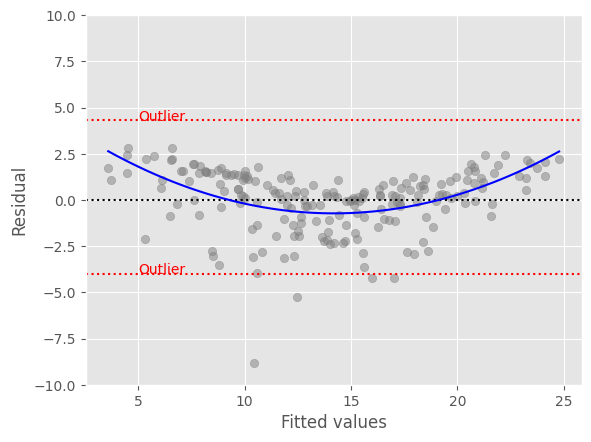

In [ ]:
# Check equal variance
plt.scatter(Full_model_result._results.fittedvalues,Full_model_result._results.resid,color='grey',alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0,color='black',linestyle = 'dotted')
plt.ylim(-10,10)

plt.axhline(y=(Q1 - 1.5*IQR),color='red',linestyle='dotted')
plt.axhline(y=(Q3 + 1.5*IQR),color='red',linestyle='dotted')
plt.text(5,(Q1 - 1.5*IQR),'Outlier',color='red')
plt.text(5,(Q3 + 1.5*IQR),'Outlier',color='red')

# Curved fitting
coeff=np.polyfit(Full_model_result.fittedvalues,Full_model_result._results.resid,2)
b0=coeff[0]
b1=coeff[1]
b2=coeff[2]
Vtrend=np.linspace(min(Full_model_result.fittedvalues),max(Full_model_result.fittedvalues),100)
Ttrend=b0* Vtrend* Vtrend+b1* Vtrend+b2
plt.plot(Vtrend,Ttrend,'blue')

((array([-2.70069508, -2.39117927, -2.21476595, -2.08844273, -1.98865134,
         -1.90545091, -1.83366817, -1.77025272, -1.7132485 , -1.66132288,
         -1.61352545, -1.56915347, -1.52767212, -1.48866446, -1.45179889,
         -1.41680716, -1.38346902, -1.35160134, -1.32105008, -1.29168444,
         -1.26339229, -1.23607681, -1.20965371, -1.18404921, -1.1591983 ,
         -1.13504337, -1.11153314, -1.08862177, -1.06626803, -1.04443478,
         -1.02308837, -1.00219826, -0.9817366 , -0.96167793, -0.94199891,
         -0.9226781 , -0.90369573, -0.88503353, -0.86667459, -0.84860322,
         -0.83080482, -0.8132658 , -0.79597346, -0.77891592, -0.76208206,
         -0.74546144, -0.72904425, -0.71282124, -0.69678371, -0.68092342,
         -0.6652326 , -0.64970389, -0.63433029, -0.61910517, -0.60402223,
         -0.58907547, -0.57425918, -0.55956789, -0.5449964 , -0.53053972,
         -0.51619308, -0.50195192, -0.48781183, -0.47376862, -0.45981823,
         -0.44595676, -0.43218046, -0.

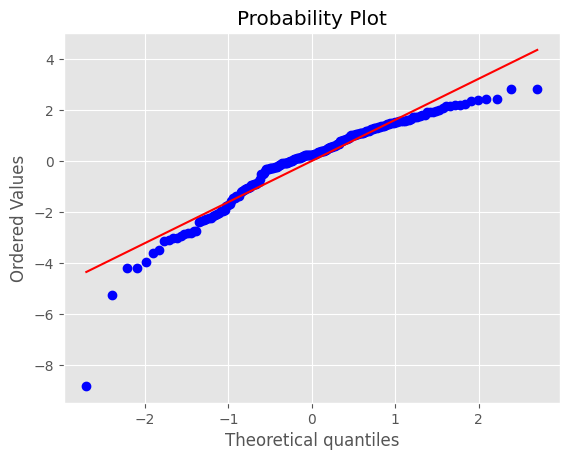

In [ ]:
# Check Normality
import scipy.stats as stats
plt.figure()
stats.probplot(Full_model_result._results.resid,dist = stats.norm,plot=plt)

### Systematic component assumptions

Text(0.5, 1.0, 'newspaper')

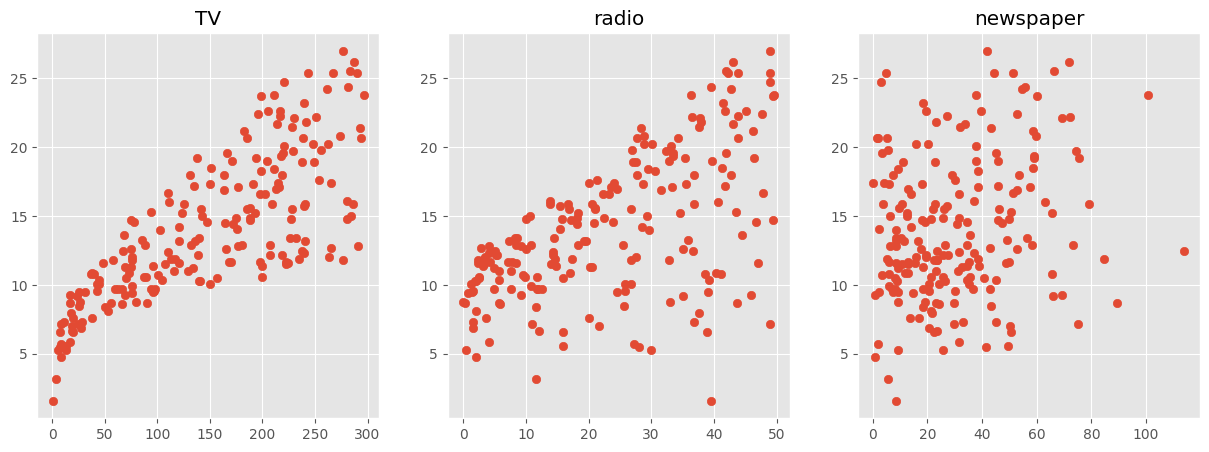

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(131)
ax.scatter(df['TV'],df['sales'])
ax.set_title("TV")

ax = plt.subplot(132)
ax.scatter(df['radio'],df['sales'])
ax.set_title("radio")

ax = plt.subplot(133)
ax.scatter(df['newspaper'],df['sales'])
ax.set_title("newspaper")

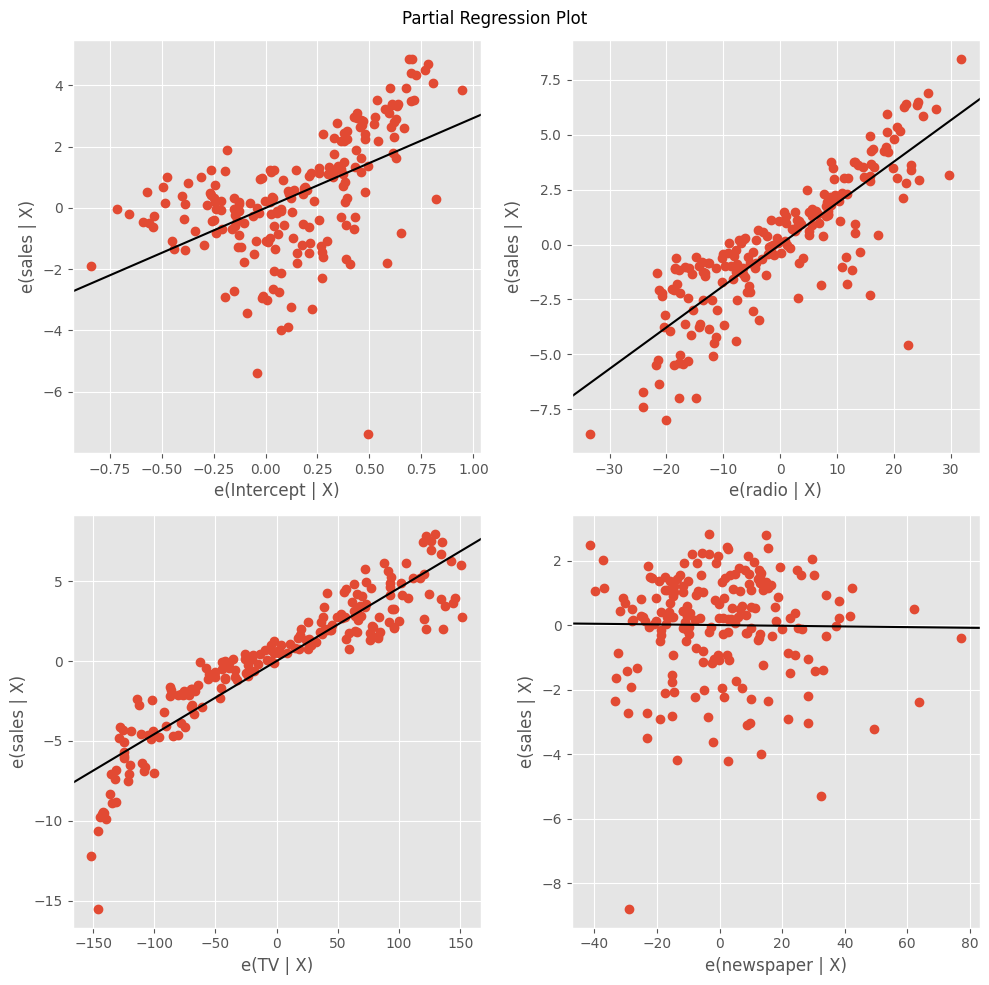

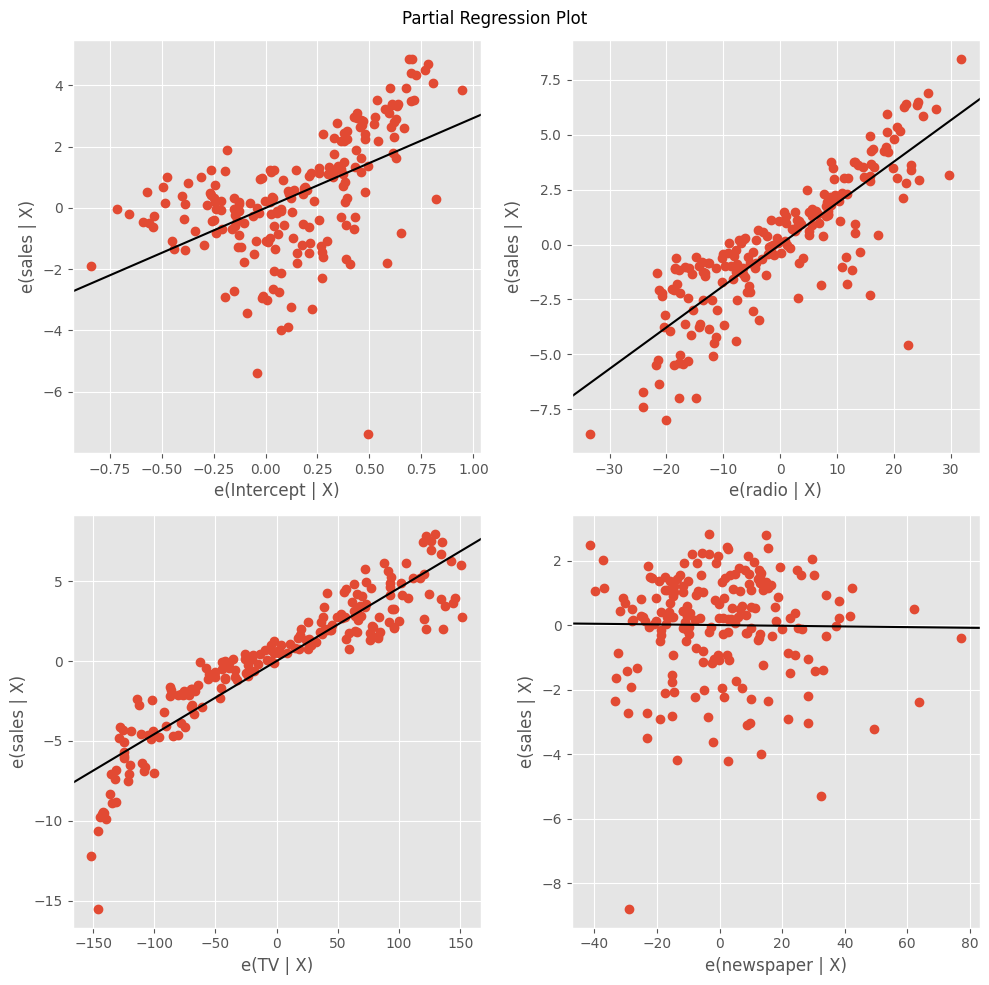

In [ ]:
# Linearity
fig = plt.figure(figsize=(10,10))
sm.graphics.plot_partregress_grid(Full_model_result,fig = fig)
#sm.graphics.plot_partregress(endog = 'sales', exog_i = 'TV', exog_others = ['radio','newspaper'], data=df, obs_labels=False,ax = ax)

## Model Selection & Prediction

In [ ]:
import math
df['sales_log']=df['sales'].apply(math.log)

In [ ]:
model = sm.OLS.from_formula('sales_log ~ 1+ TV + radio',data=df)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sales_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     392.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.85e-69
Time:                        05:55:07   Log-Likelihood:                 53.597
No. Observations:                 200   AIC:                            -101.2
Df Residuals:                     197   BIC:                            -91.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7451      0.033     53.425      0.000       1.681       1.809
TV             0.0037      0.000     23.818      0.000       0.003       0.004
radio          0.0120      0.001     13.439      0.000       0.010       0.014
==============================================================================
Omnibus:                      241.255   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13639.634
Skew:                          -4.842   Prob(JB):                         0.00
Kurtosis:                      42.281   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Q1 = np.quantile(result._results.resid,0.25)
Q3 = np.quantile(result._results.resid,0.75)
IQR = Q3 - Q1
Q1 - 1.5*IQR
Q3 - 1.5*IQR

-0.13718703168131088

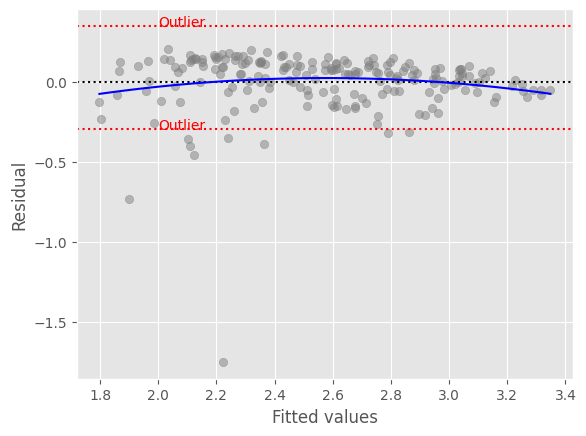

In [ ]:
# Check equal variance
plt.scatter(result._results.fittedvalues,result._results.resid,color='grey',alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.axhline(y=0,color='black',linestyle = 'dotted')

plt.axhline(y=(Q1 - 1.5*IQR),color='red',linestyle='dotted')
plt.axhline(y=(Q3 + 1.5*IQR),color='red',linestyle='dotted')
plt.text(2,(Q1 - 1.5*IQR),'Outlier',color='red')
plt.text(2,(Q3 + 1.5*IQR),'Outlier',color='red')

# Curved fitting
coeff=np.polyfit(result.fittedvalues,result._results.resid,2)
b0=coeff[0]
b1=coeff[1]
b2=coeff[2]
Vtrend=np.linspace(min(result.fittedvalues),max(result.fittedvalues),100)
Ttrend=b0* Vtrend* Vtrend+b1* Vtrend+b2
plt.plot(Vtrend,Ttrend,'blue')

In [ ]:
(Q1 - 1.5*IQR)

-0.2990048769129592

In [ ]:
# Remove outlier

np.where(result._results.resid>=(Q3 + 1.5*IQR))
np.where(result._results.resid<=(Q1 - 1.5*IQR))

(array([  5,  35,  56,  78, 126, 130, 132, 155, 178]),)

In [ ]:
df_adj = df.drop([  5,  35,  56,  78, 126, 130, 132, 155, 178],axis = 0)
df_adj.reset_index(inplace=True,drop=True)
len(df_adj)

191

In [ ]:
Y = np.array(df_adj[['sales_log']])
X = np.array(df_adj[['constant','TV','radio']])

In [ ]:
model = sm.OLS(Y,X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1163.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.42e-106
Time:                        05:55:07   Log-Likelihood:                 172.75
No. Observations:                 191   AIC:                            -339.5
Df Residuals:                     188   BIC:                            -329.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8178      0.018    102.131      0.000       1.783       1.853
x1             0.0032   8.76e-05     36.616      0.000       0.003       0.003
x2             0.0130      0.000     26.707      0.000       0.012       0.014
==============================================================================
Omnibus:                       38.822   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.867
Skew:                          -1.163   Prob(JB):                     4.48e-13
Kurtosis:                       4.319   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_true = list(df_adj['sales_log'])
y_pred = result.predict(X)

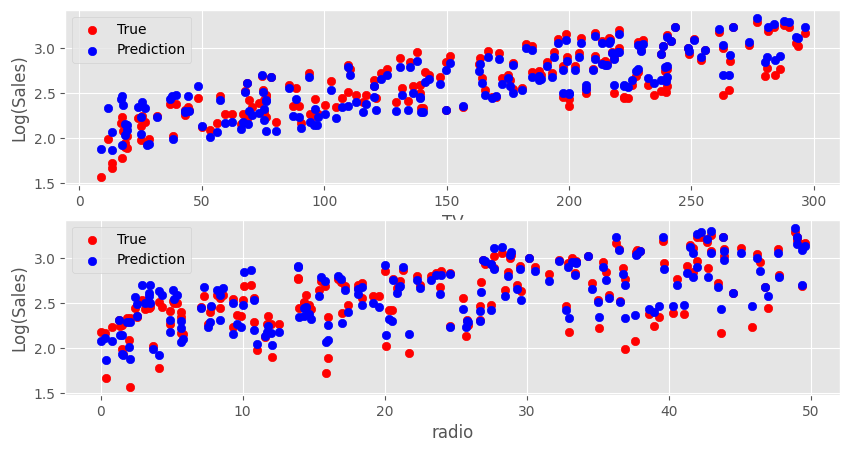

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(211)
ax.scatter(X[:,1],y_true,color='red',label='True')
ax.scatter(X[:,1],y_pred,color='blue',label="Prediction")
ax.set_xlabel('TV')
ax.set_ylabel('Log(Sales)')

ax.legend()

ax = plt.subplot(212)
ax.scatter(X[:,2],y_true,color='red',label='True')
ax.scatter(X[:,2],y_pred,color='blue',label="Prediction")
ax.set_xlabel('radio')
ax.set_ylabel('Log(Sales)')
ax.legend()

In [ ]:
df_adj.head()

Unnamed: 0     TV  radio  newspaper  sales  constant  sales_log
0           1  230.1   37.8       69.2   22.1         1   3.095578
1           2   44.5   39.3       45.1   10.4         1   2.341806
2           3   17.2   45.9       69.3    9.3         1   2.230014
3           4  151.5   41.3       58.5   18.5         1   2.917771
4           5  180.8   10.8       58.4   12.9         1   2.557227

In [ ]:
result.predict([1,230.1,37.8])

array([3.04816089])

# Week 4: Classifier

## Logistic Regression

### Simple Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv(r'/content/drive/MyDrive/Data/Default.csv')
df.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [15]:
len(df), len(df.dropna())

(10000, 10000)

In [16]:
df.describe()

balance        income
count  10000.000000  10000.000000
mean     835.374886  33516.981876
std      483.714985  13336.639563
min        0.000000    771.967729
25%      481.731105  21340.462903
50%      823.636973  34552.644802
75%     1166.308386  43807.729272
max     2654.322576  73554.233495

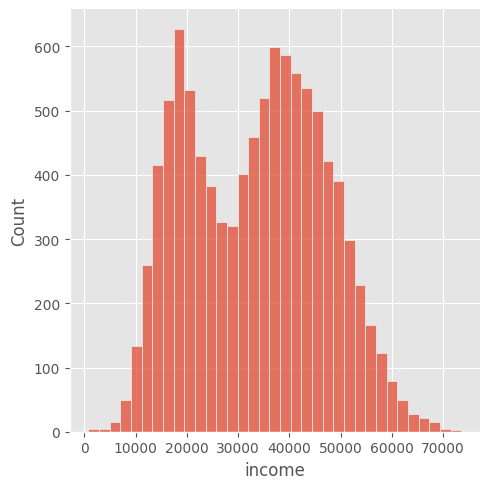

In [17]:
sns.displot(data=df,x='income')

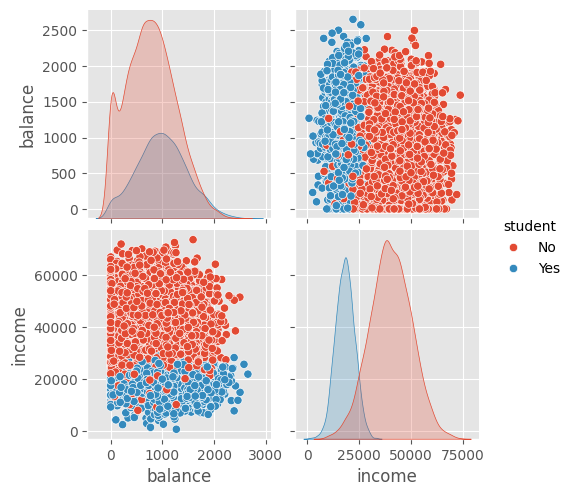

In [18]:
sns.pairplot(df,hue='student')

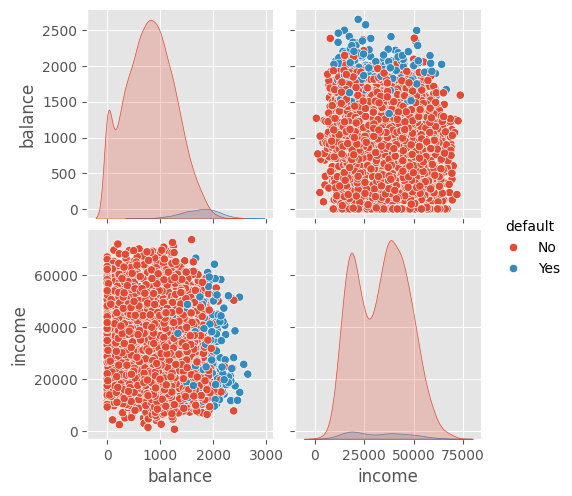

In [19]:
sns.pairplot(df,hue='default')

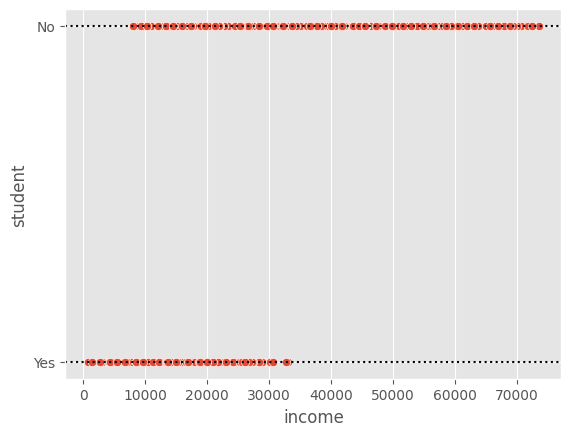

In [20]:
sns.scatterplot(data=df,x='income',y='student',sizes=(10,10),alpha=1)
plt.xlabel("income")
plt.ylabel("student")

plt.axhline(y = 0, color='black', linestyle='dotted')
plt.axhline(y = 1, color='black', linestyle='dotted')

In [21]:
df['No_student'] = df.apply(lambda x: 1 if x['student']=='No' else 0, axis=1)
Counter(df['No_student'])

Counter({1: 7056, 0: 2944})

In [22]:
df['No_student']

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: No_student, Length: 10000, dtype: int64

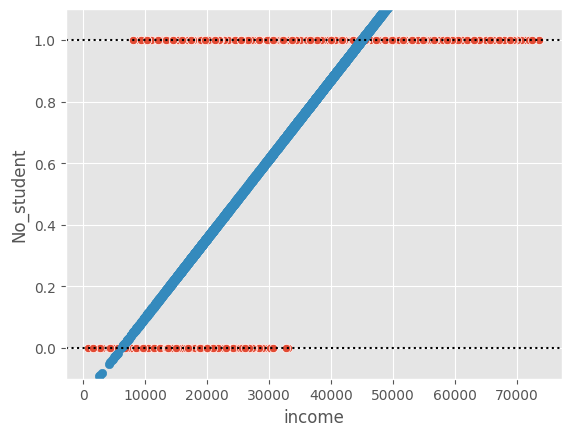

In [23]:
# Simple OLS
Y = np.array(df['No_student'])
X = np.array(df["income"])
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result= model.fit()
result.summary()

sns.scatterplot(data=df,x='income',y='No_student',sizes=(10,10),alpha=1)
plt.xlabel("income")
plt.ylabel("No_student")

plt.scatter(X[:,1],result.predict())

plt.ylim(-0.1,1.1)
plt.axhline(y = 0, color='black', linestyle='dotted')
plt.axhline(y = 1, color='black', linestyle='dotted')

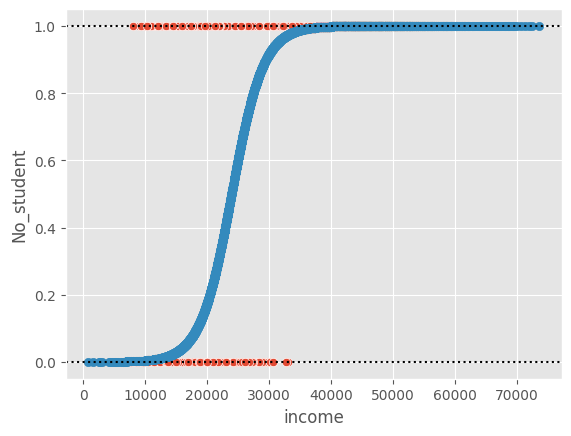

In [24]:
# Logistic Regression
Y = np.array(df['No_student'])
X = np.array(df["income"])
X = sm.add_constant(X)
model = sm.GLM(Y,X,family = sm.families.Binomial())
result = model.fit()
result.summary()
sns.scatterplot(data=df,x='income',y='No_student',sizes=(10,10),alpha=1)
plt.xlabel("income")
plt.ylabel("No_student")

plt.scatter(X[:,1],result.predict())

plt.axhline(y = 0, color='black', linestyle='dotted')
plt.axhline(y = 1, color='black', linestyle='dotted')

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1708.8
Date:                Mon, 25 Mar 2024   Deviance:                       3417.6
Time:                        23:00:55   Pearson chi2:                 9.37e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5812
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4359      0.228    -41.299      0.000      -9.884      -8.988
x1             0.0004   9.54e-06     41.349      0.000       0.000       0.000
==============================================================================
"""

In [26]:
from sklearn.metrics import confusion_matrix
probs= result.predict()
probs[0:10]

array([0.99968621, 0.00938204, 0.95678875, 0.99053756, 0.99679377,
       0.00153122, 0.59633003, 0.076434  , 0.99525967, 0.89228955])

In [27]:
df['No_student']

0       1
1       0
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: No_student, Length: 10000, dtype: int64

In [28]:
y_pred = np.array([0]*len(df))
y_pred[probs>0.5]=1

Text(50.722222222222214, 0.5, 'True')

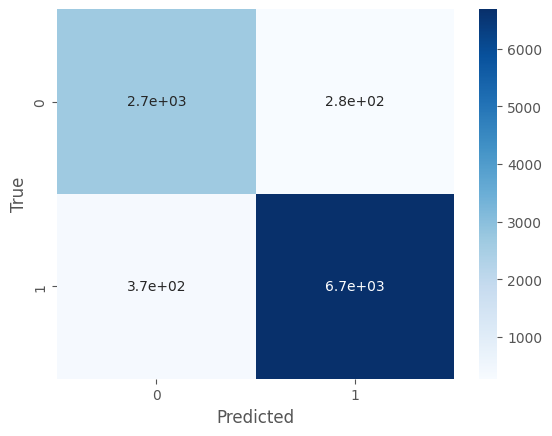

In [29]:
cm = confusion_matrix(df['No_student'], y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(50.722222222222214, 0.5, 'True')

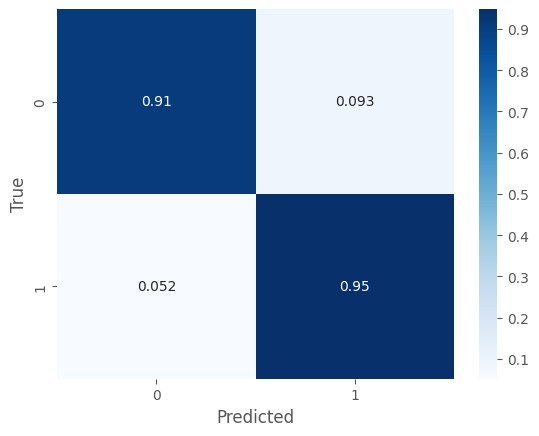

In [30]:
cm = confusion_matrix(df['No_student'], y_pred,normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [31]:
# scikit-learn use
from sklearn.model_selection import train_test_split
train, test       = train_test_split(df, test_size = 0.2, random_state=1)
train, validation = train_test_split(train, test_size = 0.1, random_state=1)

In [32]:
feature = ['income']
target = ['No_student']

In [33]:
X_train, y_train = train[feature], train[target]
X_validation, y_validation = validation[feature], validation[target]
X_test, y_test = test[feature], test[target]

In [34]:
X_train.shape, X_validation.shape, X_test.shape,

((7200, 1), (800, 1), (2000, 1))

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sclaed = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

X_train_sclaed.T[0].mean(), X_train_sclaed.std()

(2.7040098555314925e-16, 0.9999999999999999)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sclaed, y_train)

print(f"validation accuracy: %.2f"%(model.score(X_validation_scaled, y_validation)))
print(f"test accuracy: %.2f"%(model.score(X_test_scaled, y_test)))

validation accuracy: 0.94
test accuracy: 0.93


Text(50.722222222222214, 0.5, 'True')

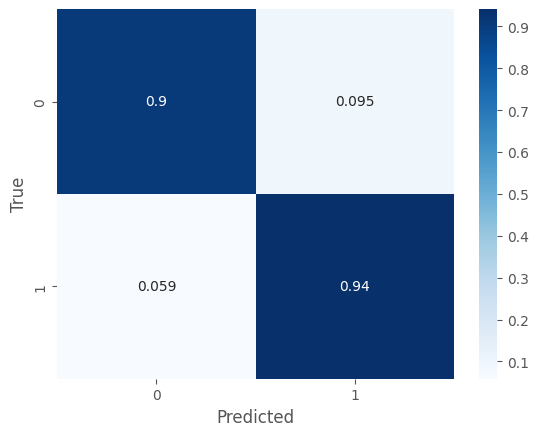

In [37]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

print('Accuracy:%.3f'%((tp+tn)/(tp+fn+fp+tn)))
print('Precision:%.3f'%(precision))
print('Recall:%.3f'%(recall))
print('F1-Score:%.3f'%((2*precision*recall)/(precision+recall)))

Accuracy:0.930
Precision:0.957
Recall:0.941
F1-Score:0.949


### Multiple Logistic Regression

In [39]:
df = pd.read_csv(r'/content/drive/MyDrive/Data/Hitters.csv')
df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

In [40]:
len(df), len(df.dropna())

(322, 263)

In [41]:
df = df.dropna()
df.reset_index(inplace=True,drop=True)

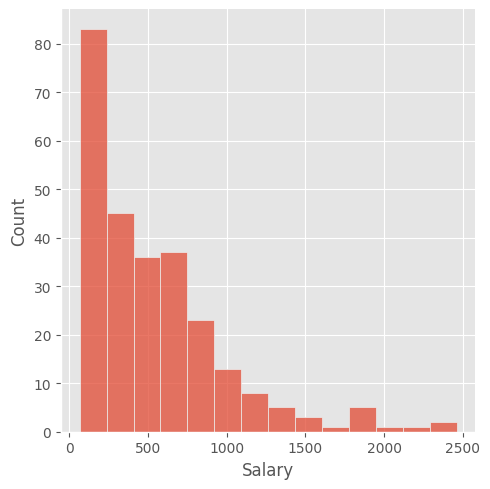

In [42]:
sns.displot(data=df,x='Salary')

In [43]:
high_salary = np.quantile(df['Salary'],0.8)

df['Salary_Level'] = df.apply(lambda x: 0 if x['Salary'] <= high_salary else 1, axis=1)
Counter(df['Salary_Level'])

Counter({0: 210, 1: 53})

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AtBat         263 non-null    int64  
 1   Hits          263 non-null    int64  
 2   HmRun         263 non-null    int64  
 3   Runs          263 non-null    int64  
 4   RBI           263 non-null    int64  
 5   Walks         263 non-null    int64  
 6   Years         263 non-null    int64  
 7   CAtBat        263 non-null    int64  
 8   CHits         263 non-null    int64  
 9   CHmRun        263 non-null    int64  
 10  CRuns         263 non-null    int64  
 11  CRBI          263 non-null    int64  
 12  CWalks        263 non-null    int64  
 13  League        263 non-null    object 
 14  Division      263 non-null    object 
 15  PutOuts       263 non-null    int64  
 16  Assists       263 non-null    int64  
 17  Errors        263 non-null    int64  
 18  Salary        263 non-null    

In [45]:
"""
AtBat: Number of times at bat in 1986
Hits: Number of hits in 1986
HmRun: Number of home runs in 1986
Runs: Number of runs in 1986
RBI: Number of runs batted in in 1986
Walks: Number of walks in 1986
Years: Number of years in the major leagues
CAtBat: Number of times at bat during his career
CHits: Number of hits during his career
CHmRun: Number of home runs during his career
CRuns: Number of runs during his career
CRBI: Number of runs batted in during his career
CWalks: Number of walks during his career
League: A factor with levels A and N indicating player's league at the end of 1986
Division: A factor with levels E and W indicating player's division at the end of 1986
PutOuts: Number of put outs in 1986
Assists: Number of assists in 1986
Errors: Number of errors in 1986
Salary: 1987 annual salary on opening day in thousands of dollars
NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987
"""

"\nAtBat: Number of times at bat in 1986\nHits: Number of hits in 1986\nHmRun: Number of home runs in 1986\nRuns: Number of runs in 1986\nRBI: Number of runs batted in in 1986\nWalks: Number of walks in 1986\nYears: Number of years in the major leagues\nCAtBat: Number of times at bat during his career\nCHits: Number of hits during his career\nCHmRun: Number of home runs during his career\nCRuns: Number of runs during his career\nCRBI: Number of runs batted in during his career\nCWalks: Number of walks during his career\nLeague: A factor with levels A and N indicating player's league at the end of 1986\nDivision: A factor with levels E and W indicating player's division at the end of 1986\nPutOuts: Number of put outs in 1986\nAssists: Number of assists in 1986\nErrors: Number of errors in 1986\nSalary: 1987 annual salary on opening day in thousands of dollars\nNewLeague: A factor with levels A and N indicating player's league at the beginning of 1987\n"

In [46]:
sns.pairplot(df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years','League', 'Division',
       'PutOuts', 'Assists', 'Errors','Salary_Level']],hue="Salary_Level")

Output hidden; open in https://colab.research.google.com to view.

In [47]:
feature = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years','PutOuts', 'Assists', 'Errors']
target = ['Salary_Level']

(207, 10) (3, 10) (53, 10)
validation accuracy: 0.67
test accuracy: 0.79
Accuracy:0.792
Precision:1.000
Recall:0.154
F1-Score:0.267


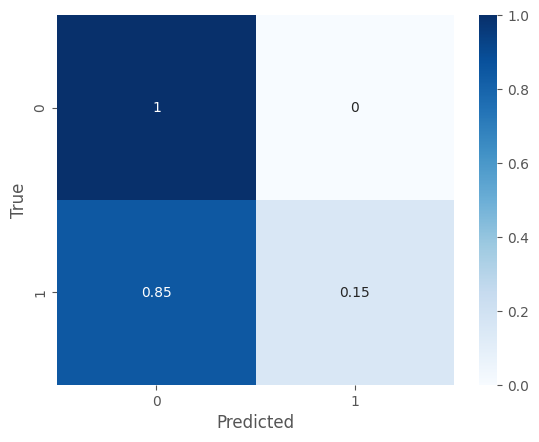

In [48]:
train, test       = train_test_split(df, test_size = 0.2, random_state=1)
train, validation = train_test_split(train, test_size = 0.01, random_state=1)

X_train, y_train = train[feature], train[target]
X_validation, y_validation = validation[feature], validation[target]
X_test, y_test = test[feature], test[target]

print(X_train.shape, X_validation.shape, X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print(f"validation accuracy: %.2f"%(model.score(X_validation_scaled, y_validation)))
print(f"test accuracy: %.2f"%(model.score(X_test_scaled, y_test)))

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

print('Accuracy:%.3f'%((tp+tn)/(tp+fn+fp+tn)))
print('Precision:%.3f'%(precision))
print('Recall:%.3f'%(recall))
print('F1-Score:%.3f'%((2*precision*recall)/(precision+recall)))

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [50]:
model = DecisionTreeClassifier(random_state=0,max_depth = 3)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.4230769230769231, 0.875, 'Hits <= 0.286\ngini = 0.306\nsamples = 207\nvalue = [168, 39]\nclass = Low Salary'),
 Text(0.15384615384615385, 0.625, 'AtBat <= -2.208\ngini = 0.12\nsamples = 125\nvalue = [117, 8]\nclass = Low Salary'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = High Salary'),
 Text(0.23076923076923078, 0.375, 'Years <= 0.406\ngini = 0.107\nsamples = 124\nvalue = [117, 7]\nclass = Low Salary'),
 Text(0.15384615384615385, 0.125, 'gini = 0.022\nsamples = 88\nvalue = [87, 1]\nclass = Low Salary'),
 Text(0.3076923076923077, 0.125, 'gini = 0.278\nsamples = 36\nvalue = [30, 6]\nclass = Low Salary'),
 Text(0.6923076923076923, 0.625, 'Years <= -0.419\ngini = 0.47\nsamples = 82\nvalue = [51, 31]\nclass = Low Salary'),
 Text(0.5384615384615384, 0.375, 'Runs <= 2.299\ngini = 0.191\nsamples = 28\nvalue = [25, 3]\nclass = Low Salary'),
 Text(0.46153846153846156, 0.125, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]\nclass = Low Salary'),
 Te

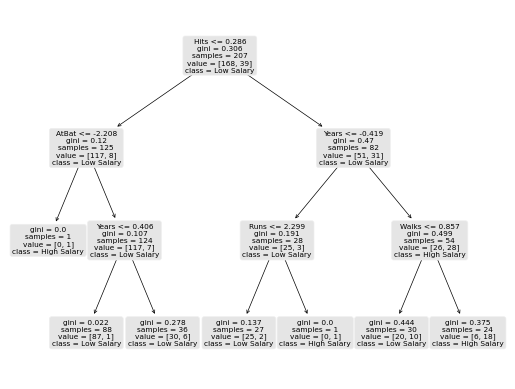

In [51]:
tree.plot_tree(model,
               class_names=['Low Salary','High Salary'],
               feature_names=feature,
               impurity=True, filled=False,
               rounded=True)

validation accuracy: 0.67
test accuracy: 0.85
Accuracy:0.849
Precision:0.857
Recall:0.462
F1-Score:0.600


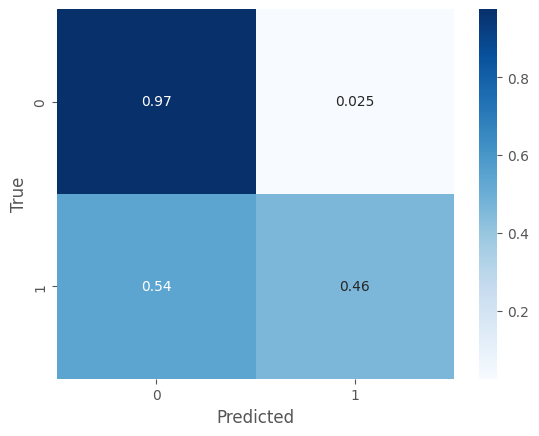

In [52]:
print(f"validation accuracy: %.2f"%(model.score(X_validation_scaled, y_validation)))
print(f"test accuracy: %.2f"%(model.score(X_test_scaled, y_test)))

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

print('Accuracy:%.3f'%((tp+tn)/(tp+fn+fp+tn)))
print('Precision:%.3f'%(precision))
print('Recall:%.3f'%(recall))
print('F1-Score:%.3f'%((2*precision*recall)/(precision+recall)))

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0,max_depth = 3)
rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=3, random_state=0)

validation accuracy: 0.67
test accuracy: 0.81
Accuracy:0.811
Precision:1.000
Recall:0.231
F1-Score:0.375


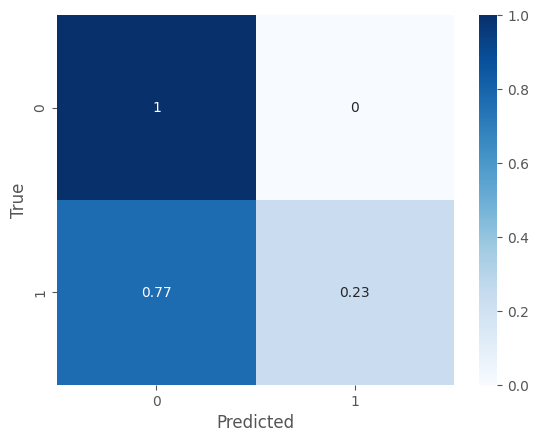

In [54]:
print(f"validation accuracy: %.2f"%(rf_model.score(X_validation_scaled, y_validation)))
print(f"test accuracy: %.2f"%(rf_model.score(X_test_scaled, y_test)))

y_pred = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

print('Accuracy:%.3f'%((tp+tn)/(tp+fn+fp+tn)))
print('Precision:%.3f'%(precision))
print('Recall:%.3f'%(recall))
print('F1-Score:%.3f'%((2*precision*recall)/(precision+recall)))

## Assignment 2

In [55]:
np.quantile(df['Salary'],0.7), np.quantile(df['Salary'],0.3)

700.0

test accuracy: 0.83
Accuracy:0.830
Precision:0.769
Recall:0.625
F1-Score:0.690


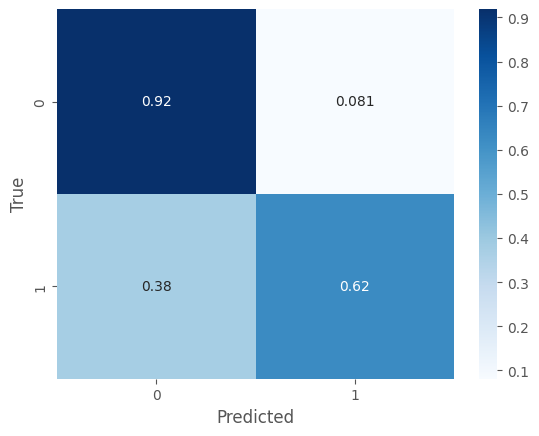

In [57]:
# Multiple Logistic Regression 파트를 참고
# 아래 상태에서 시작하여,
feature = ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years']
target = ['Salary_Level']

df = pd.read_csv(r'/content/drive/MyDrive/Data/Hitters.csv')
df = df.dropna()
df.reset_index(inplace=True,drop=True)

# 1. 상위 30프로의 Salary 선수를 1, 그렇지 않으면 0로 Labeling
# (수정) 1. 상위 30프로의 Salary 선수를 1, 그렇지 않으면 0로 Labeling
high_salary = np.quantile(df['Salary'],0.7)
df['Salary_Level'] = df.apply(lambda x: 0 if x['Salary'] <= high_salary else 1, axis=1)

# 2. train과 test 셋을 0.8:0.2로 split, random state = 0
train, test = train_test_split(df, test_size = 0.2 , random_state = 0)

X_train, y_train = train[feature], train[target]
X_test, y_test = test[feature], test[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train) # 3. model.fit에 적절한 X와 y 입력

print(f"test accuracy: %.2f"%(model.score(X_test_scaled, y_test)))
y_pred = model.predict(X_test_scaled) # 4. 적절한 X 값 입력

cm = confusion_matrix(y_test, y_pred, normalize = 'true')
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = (tp)/(tp+fp)
recall = (tp)/(tp+fn)

print('Accuracy:%.3f'%((tp+tn)/(tp+fn+fp+tn)))
print('Precision:%.3f'%(precision))
print('Recall:%.3f'%(recall))
print('F1-Score:%.3f'%((2*precision*recall)/(precision+recall)))

In [58]:
# 블랙보드에 Assignment_df를 csv 파일 형태로 제출
Assignment_df = pd.DataFrame()
Assignment_df["value"]=[
    round((tp+tn)/(tp+fn+fp+tn),3), round(precision,3), round(recall,3), round ((2*precision*recall)/(precision+recall),3)
]

# your_directory에 각자 저장할 디렉토리 입력
#Assignment_df.to_csv(r'your_directory',index=False)
Assignment_df

value
0  0.830
1  0.769
2  0.625
3  0.690

# Week 5: Unsupervised Learning

## Dimensionality Reduction

## Principal Component Analysis

In [6]:
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# USArrests
# For each of the 50 states in the US, the data set contains the number of arrests per 100,000 resident for each of thress crimes: Assault, Murder, Rape
# UrbanPop: the percent of the population in each state living in urban areas
USArrests = get_rdataset('USArrests').data
USArrests.head()

Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

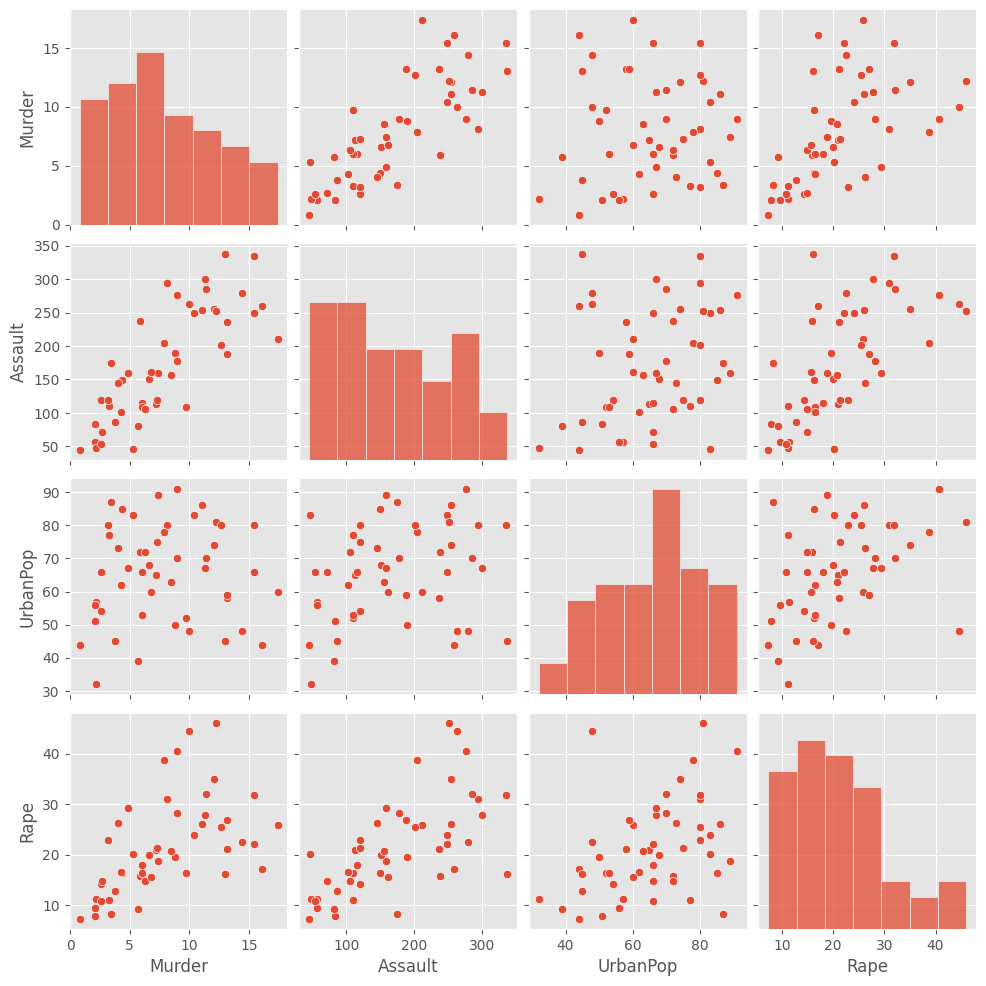

In [7]:
sns.pairplot(USArrests)

In [8]:
USArrests.corr()

Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000

In [9]:
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [10]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [11]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [12]:
USArrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.0+ KB


In [13]:
# k = 50, m = 4
USArrests.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(USArrests)
X_scaled.shape

(50, 4)

In [15]:
# 고유값 분해로 PCA 도출
n = 50
X_tilde = np.transpose(X_scaled)
S = (1/n)*X_tilde@np.transpose(X_tilde)
eigen_values, eigen_vectors = np.linalg.eig(S)

In [16]:
eigen_values

array([2.48024158, 0.98976515, 0.17343009, 0.35656318])

In [17]:
eigen_vectors

array([[ 0.53589947,  0.41818087,  0.6492278 , -0.34123273],
       [ 0.58318363,  0.1879856 , -0.74340748, -0.26814843],
       [ 0.27819087, -0.87280619,  0.13387773, -0.37801579],
       [ 0.54343209, -0.16731864,  0.08902432,  0.81777791]])

In [18]:
# 사이킷런 활용
pca = PCA()
pca.fit(X_scaled)

PCA()

In [19]:
pca.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [20]:
eigen_values

array([2.48024158, 0.98976515, 0.17343009, 0.35656318])

In [21]:
eigen_vectors

array([[ 0.53589947,  0.41818087,  0.6492278 , -0.34123273],
       [ 0.58318363,  0.1879856 , -0.74340748, -0.26814843],
       [ 0.27819087, -0.87280619,  0.13387773, -0.37801579],
       [ 0.54343209, -0.16731864,  0.08902432,  0.81777791]])

In [22]:
# 첫번째 주성분
eigen_vectors[:,0]

array([0.53589947, 0.58318363, 0.27819087, 0.54343209])

In [23]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [24]:
# 첫번쨰 주성분
pca.components_[0,:]

array([0.53589947, 0.58318363, 0.27819087, 0.54343209])

In [25]:
# 첫번쨰 주성분의 두번째 feature의 load
pca.components_[0,1]

0.5831836349096705

In [26]:
dict(zip(USArrests.columns,pca.components_[0,:]))
# 첫번째 주성분 해석
# Assault, Rape, Murder, UrbanPop 순으로 Loading

{'Murder': 0.5358994749381552,
 'Assault': 0.5831836349096705,
 'UrbanPop': 0.2781908746194331,
 'Rape': 0.5434320914456827}

In [27]:
dict(zip(USArrests.columns,pca.components_[1,:]))
# 두번째 주성분 해석
# Murder, Assault 순으로 양의 Loading, Rape, UrbanPop와는 음의 Loading

{'Murder': 0.41818086542095456,
 'Assault': 0.18798560423193889,
 'UrbanPop': -0.8728061930604254,
 'Rape': -0.16731863540174574}

In [28]:
# Score는 각 주성분들로 projection한 값
scores = pca.transform(X_scaled)
scores.shape

(50, 4)

In [29]:
X_scaled@pca.components_[0,:]

array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

In [30]:
# 첫번쨰 주성분으로 projection한 값
scores[:,0]

array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

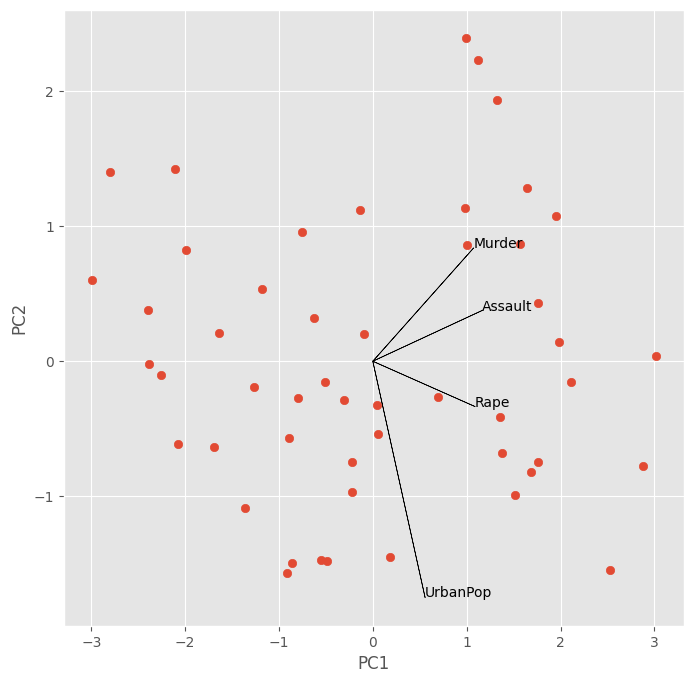

In [31]:
# Biplot
# 주성분 각 축과 Align된 기존 성분이 주성분의 성격을 가짐 (Direction)
# 검은색 선의 길이는 Loading, 길이가 길수록 주성분에 큰 영향 (Loading)
#

scale_arrow = s_ = 2
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[j,k],color='black')
    ax.text(s_*pca.components_[i,k],
            s_*pca.components_[j,k],
            USArrests.columns[k])

In [32]:
# PC들의 표준편차

scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [33]:
# 표준편차의 제곱 = 분산
scores.std(0, ddof=1)**2

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [34]:
# 사이킷런에서 분산 설명 method 존재
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [35]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [36]:
# Explained_variance ratio는 고윳값의 비중과 동일
eigen_values / np.sum(eigen_values)

array([0.62006039, 0.24744129, 0.04335752, 0.0891408 ])

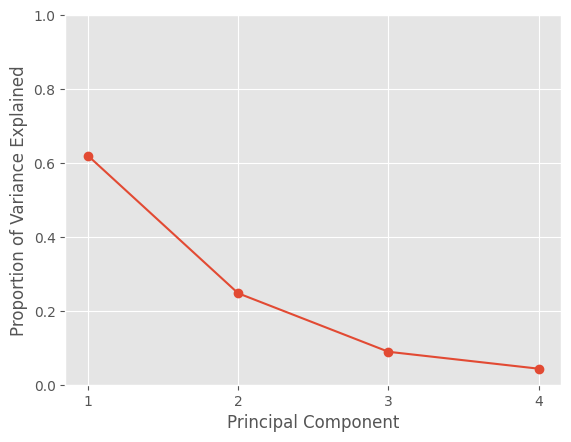

In [37]:
fig = plt.figure()
ax = plt.subplot(111)
ticks = np.arange(pca.n_components_)+1
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

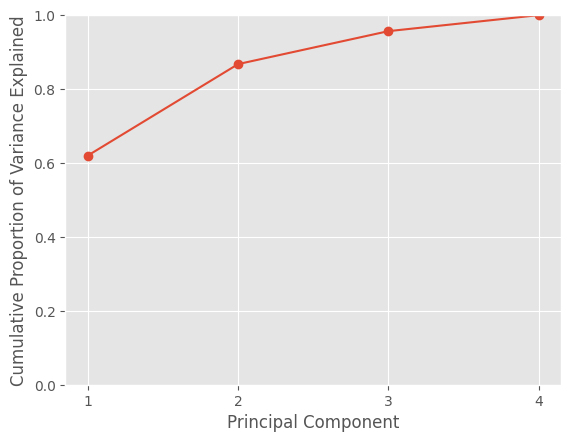

In [38]:
fig = plt.figure()
ax = plt.subplot(111)
ticks = np.arange(pca.n_components_)+1
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

## T-SNE

In [40]:
from sklearn.manifold import TSNE

In [41]:
tsne = TSNE(n_components = 2)
scores = tsne.fit_transform(X_scaled)

In [43]:
tsne

TSNE()

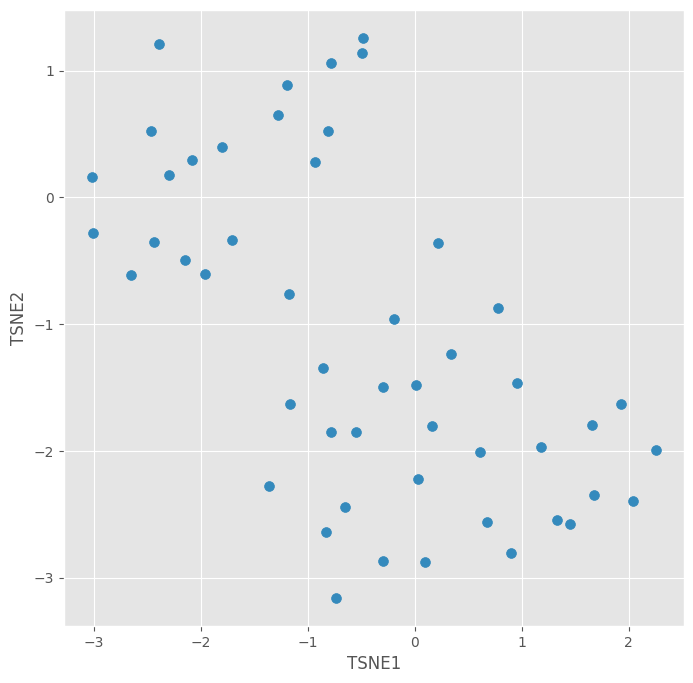

In [45]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('TSNE%d' % (i+1))
ax.set_ylabel('TSNE%d' % (j+1))

ax.scatter(scores[:,0],
           scores[:,1],
           marker='o',
           s=50)

## PCA vs. TSNE

In [112]:
data_directory = r'/content/drive/MyDrive/Data'
tsne_pca = pd.read_csv(data_directory+'/tsne_pca.csv')

In [113]:
tsne_pca.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [114]:
tsne_pca['diagnosis'] = tsne_pca['diagnosis'].factorize()[0]
tsne_pca = tsne_pca.fillna(value = 0)

In [115]:
target = tsne_pca['diagnosis']
tsne_pca = tsne_pca.drop('diagnosis', axis=1)

In [116]:
X = tsne_pca.values

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)
pca_scores = pca.fit_transform(X_scaled)

tsne = TSNE(n_components = 2)
tsne_scores = tsne.fit_transform(X_scaled)

Text(0, 0.5, 'TSNE2')

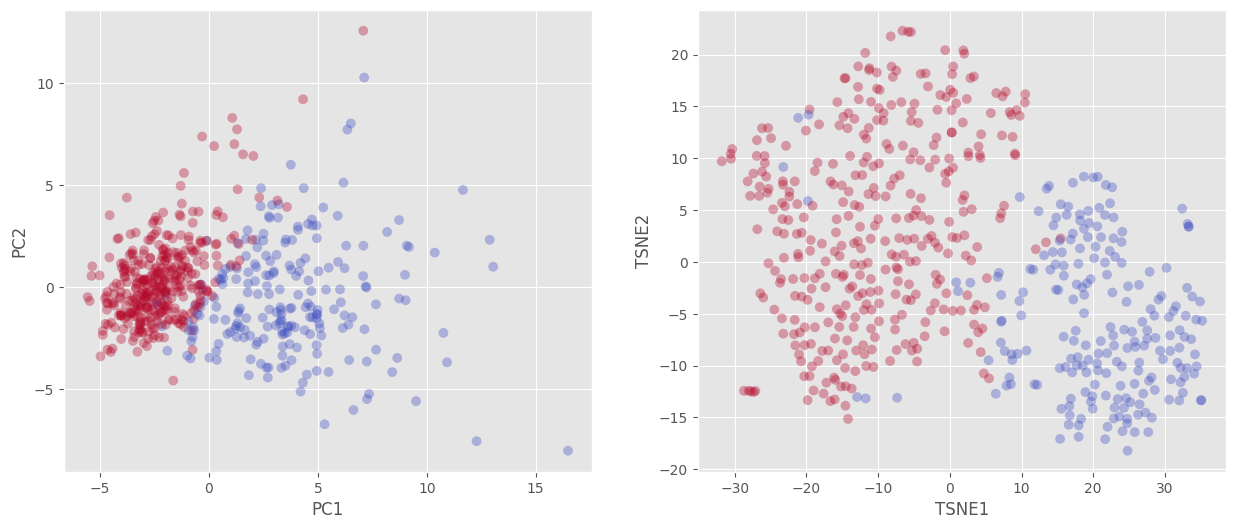

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(pca_scores[:,0],pca_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

ax = axes[1]
ax.scatter(tsne_scores[:,0],tsne_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('TSNE1'); ax.set_ylabel('TSNE2')

In [126]:
# Perplexity 가 높으면 많이 집중됨, n_iter = 1000 (default)

tsne = TSNE(n_components = 2, perplexity = 300, n_iter = 3000)
tsne_scores = tsne.fit_transform(X_scaled)

Text(0, 0.5, 'TSNE2')

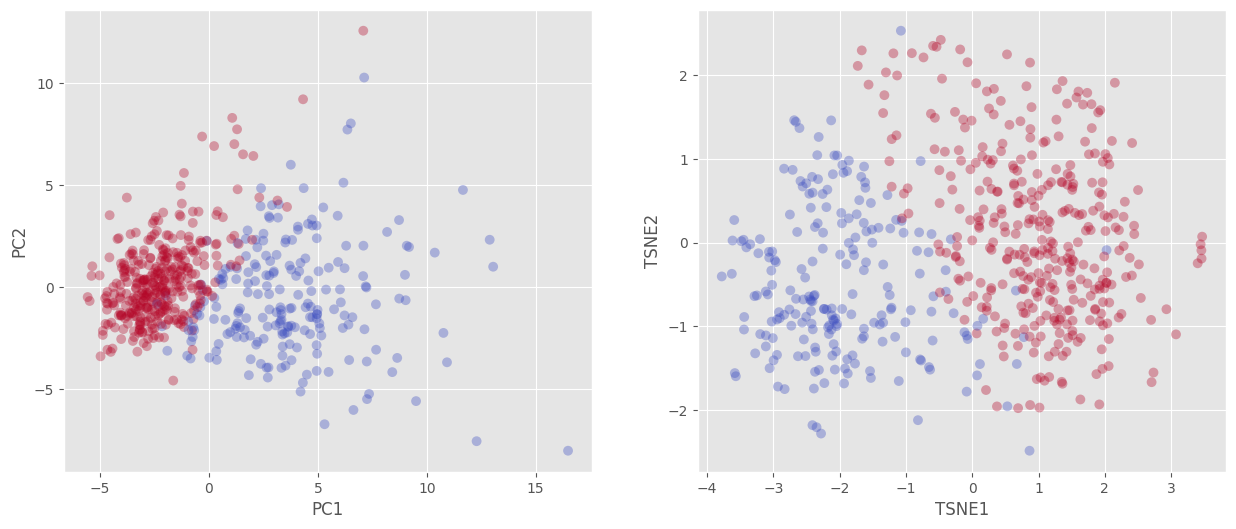

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(pca_scores[:,0],pca_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

ax = axes[1]
ax.scatter(tsne_scores[:,0],tsne_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('TSNE1'); ax.set_ylabel('TSNE2')

Text(0, 0.5, 'TSNE2')

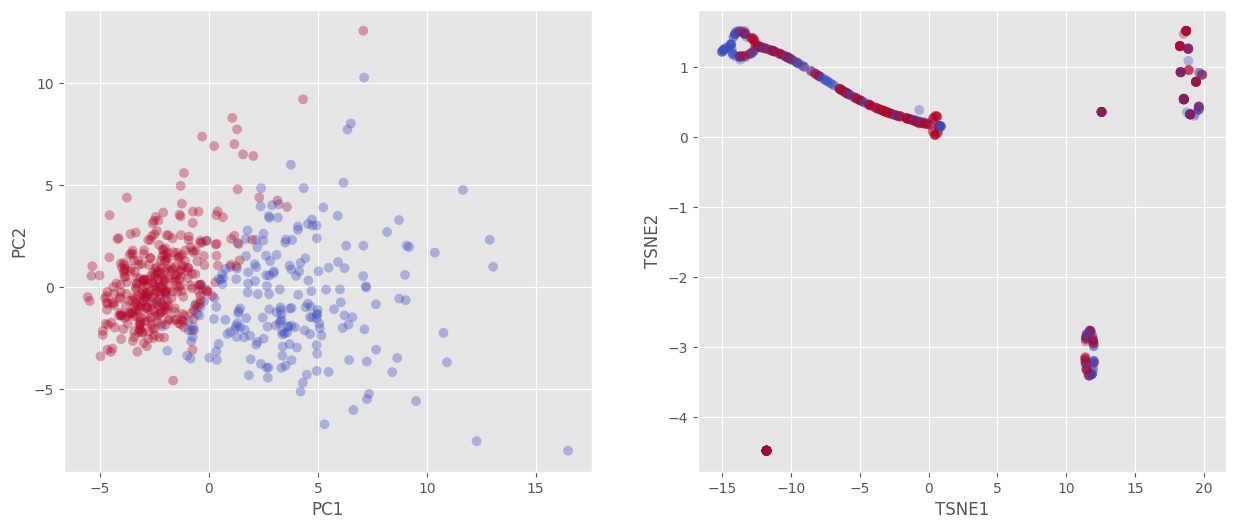

In [130]:
tsne = TSNE(n_components = 2, perplexity = 100, n_iter = 1000)
tsne_scores = tsne.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.scatter(pca_scores[:,0],pca_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')

ax = axes[1]
ax.scatter(tsne_scores[:,0],tsne_scores[:,1],c = target,
           cmap = "coolwarm", edgecolor = "None", alpha=0.35,
           marker='o',
           s=50)
ax.set_xlabel('TSNE1'); ax.set_ylabel('TSNE2')